In [1]:
import numpy as np # for array handling
import matplotlib.pyplot as plt #for plotting purposes
import scipy.special  #needed for error function

In [2]:
def gaussian(sigma=1, mu=0, x=0):
    #sigma = standard deviation away from mean
    #mu    = mean of x
    #x     = parameter on axis
    factor   = (1./ (sigma * np.sqrt(2*np.pi)))
    exponent = -0.5 *(((x- mu)/sigma)**2)
    PDF      = factor * np.exp(exponent)
    return PDF #this is not a probability (no surface just infinitdecimal PDF)

def CDFgaussian(sigma=1, mu=0, x=0):
    #sigma = standard deviation away from mean
    #mu    = mean of x
    #x     = parameter on axis
    factor = (x - mu) / (sigma * np.sqrt(2))
    erf    = scipy.special.erf( factor)
    CDF    = 0.5 * ( 1 + erf )
    return CDF #This is the cumulative of the PDF (from 0 till x) 

def inverseCDFgaussian(CDF=1, sigma=0, mu=0):
    #sigma = standard deviation away from mean
    #mu    = mean of x
    #x     = parameter on axis
    
    #scipy.special.erfinv(factor) only has a unique solution if
    #factor between -1 < factor < 1
    
    # CDF is between 0 and 1
    #CDF = 0.5 (1 + erf) -> 2 * CDF = 1+erf -> erf = 2*CDF -1
    #  2*CDF -1 is between 0 and 1
    erf_factor = CDF*2. - 1.
    
    factor = scipy.special.erfinv(erf_factor)
    x      = (factor * (sigma * np.sqrt(2))) + mu
    return x


def randomGaussianDistributedValue(sigma=1, mu=0, max_val=None, min_val=None):
    #The value is randomly distributed according to a Gaussian
    #However, there might be a abrupt max or min value where the PDF is set to 0
    #i.e. if max or min_val are not None it is not really a Gaussian anymore
    if max_val is None:
        CDF_max = 1
    else:
        CDF_max = CDFgaussian(sigma=sigma, mu=mu, x=max_val)
    if min_val is None:
        CDF_min = 0
    else:
        CDF_min = CDFgaussian(sigma=sigma, mu=mu, x=max_val)
    
    CDF_value  = np.random.uniform() # give random single nummber between 0-1
    
    
    coordinate = inverseCDFgaussian(CDF=CDF_value, sigma=sigma, mu=mu)
    return coordinate

def createRandomPolygonGivenCornersCentreRadius(nr_of_corners = 3,typeAngles='random',\
                                                x_0=0, y_0=0, radius=0, std_rad=0.4):
    
            
    
    
    #I now have a cirle with radius r centred at x and y.
    # I want three points on the circle in radians (i.e. number between 0 - 2pi)
    corners = []
    rotation = np.random.uniform() * 2 * np.pi
    for i in range(nr_of_corners):
        if typeAngles == 'random':
        #uncomment below for truly random lattices polygon
            rad = np.random.uniform() * 2 * np.pi
        
        if typeAngles == 'equal':
        #uncomment below for equallatteral polygon
            increment = (2 * np.pi) / nr_of_corners
            rad = increment*i + rotation
        
        if typeAngles == 'equalish':
            #uncomment below for bias towards equallatteral but still random
            increment = (2 * np.pi) / nr_of_corners
            rad = increment*i + rotation
            #draw random 
            rad +=randomGaussianDistributedValue(sigma=std_rad, mu=0)
        
        corners.append(rad)
    #sort radians so you can connect in order
    corners = np.sort(corners)
    #Each corner lies on a circle with radius r centred at x_0 and y_0
    #Oldskool trigonometry
    #r = x^2 + y^2
    #y = r sin(rad)
    #x = r cos(rad
    coordinates =[]
    for rad in corners:
        y = np.sin(rad) * radius + y_0
        x = np.cos(rad) * radius + x_0
        coordinates.append((x,y))
    
    return coordinates

def drawOutlinePolygon(coordinates, colour='k', zorder=1):
    
    nr_of_corners = len(coordinates)
    
    for i in range(nr_of_corners):
        x_values = [coordinates[i-1][0], coordinates[i][0]]
        y_values = [coordinates[i-1][1], coordinates[i][1]]
        axes.plot(x_values, y_values, c=colour, zorder=zorder, solid_capstyle='round')
    return

def colourInsidePolygon(coordinates, colour='k', zorder=1):
    nr_of_corners = len(coordinates)
    x_values = []
    y_values = []
    for i in range(nr_of_corners):
        x_values.append(coordinates[i][0])
        y_values.append(coordinates[i][1])
    axes.fill(x_values,y_values, colour, alpha=1., zorder=zorder)
    return


def reduceSigma(x=None, x_total=None ,slope=-1, sigma_max=2):
    dx =  x_total-x
    return max(sigma_max - slope*dx, 0.1)


(2.0, 9.0) (2.0, 9.0)


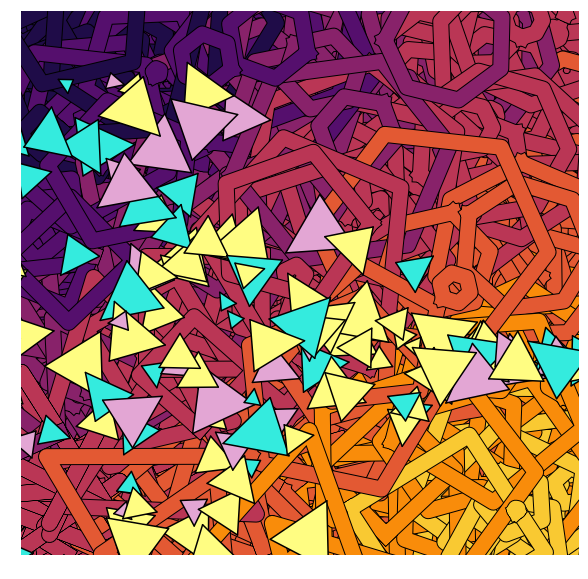

In [15]:
fig, axes = plt.subplots(1,1)
axes.axis('off')




counter =0.
min_sides = 2
max_sides = 9
linethickness  = 15.
blackthickness = 17.
max_r  = 1.5
style =1

cm = plt.get_cmap('inferno_r')
nColors  =  max_sides 
mycolors = [cm(x) for x in np.linspace(0,1 , nColors)] 
maxx = 0.
while counter < 2000:
    counter+=1
    x = np.random.uniform(min_sides,max_sides,1)
    y = np.random.uniform(min_sides,max_sides,1)
    r = np.random.uniform(0, max_r, 1)
    nr_sides = int((x + y)/2.)
    colourX = max_sides - x
    colourY = 0 + y
    colourNr = int((colourX + colourY)/2.)
    if colourNr > maxx:
        maxx = colourNr
    starting_angle = np.random.uniform(0,2*np.pi,1)
    increment = 2*np.pi/float(nr_sides)
    figureX = np.zeros(nr_sides+1)
    figureY = np.zeros(nr_sides+1)

    for i in range(nr_sides+1):
        figureX[i] = np.cos(starting_angle + increment*i)*r + x
        figureY[i] = np.sin(starting_angle + increment*i)*r + y
        if style == 3:
            axes.plot(figureX, figureY, lw=linethickness, c= mycolors[colourNr])
            axes.plot(figureX, figureY, lw=blackthickness, c= 'k')
    if style == 1:
        axes.plot(figureX, figureY, lw=blackthickness, c= 'k')
        axes.plot(figureX, figureY, lw=linethickness, c= mycolors[colourNr])

axes.set_xlim(min_sides,max_sides)
axes.set_ylim(min_sides,max_sides)
axes.axis('off')
#plt.show()data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAlgAAAF8CAYAAAATs8VhAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDMuMC4zLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvnQurowAAIABJREFUeJzs3Xd8zdcbB/DPc765GZJIkAQxgwiJTW21R2tTo1TRpQP9laLVpUaVVoettdXee6sOo/behKQkImaWjHue3x83VGQnN0P7vF+vvMq93+85z5VqPj3nfM8hZoYQQgghhLAeldMFCCGEEEL820jAEkIIIYSwMglYQgghhBBWJgFLCCGEEMLKJGAJIYQQQliZBCwhhBBCCCuTgCWEEEIIYWUSsIQQQgghrEwClhBCCCGElUnAEkIIIYSwMglYQgghhBBWJgFLCCGEEMLKJGAJIYQQQliZBCwhhBBCCCuTgCWEEEIIYWUSsIQQQgghrEwClhBCCCGElUnAEkIIIYSwMglYQgghhBBWJgFLCCGEEMLKJGDlAkTUgohK5HQdQgghhLAOCVg5jIhaA9gKYEVO1yKEEEII65CAlYOIqKFStMrVxR5KwT2n6xFCCCGEdUjAyiFEVFMp2lS2bAGb99+vDa1Rgog8crouIYQQQmSeBKwcQEQVlKJtxYu52O3c3kc1b1b60Vt1crIuIYQQQliHBKxsRkRlDIN2erg7Ou3a2dfw9MyL6tU9YWOjGEDdnK5PCCGEEJknASsbEVFRw6BdefPaue3c0cfw8soHALC3N6Fa1cIgQr0cLlEIIYQQViABK5sQkbth0E4HB1OR7Vv7KF/fhMut6tUrTgDVICLbHCpRCCGEEFYiASsbEJGrUrTdxsYos2nDK6p6dc9E19StUxzMbAegSvZXKIQQQghrkoCVxYjIUSnaqBRVWrv6ZdWgQckkr6tbt9jjX2ZXbUIIIYTIGhKwshAR2RFhDYC6SxZ1oZYtvZO91tMzL4oUyWuGPEkohBBCPPMkYGURIrIBsJgZzWb93AGdO/ulek+D+iUMw6AGWV+dEEIIIbKSBKwsQEQKwCwAHX/84UX06VM1TffVrVsMZjMXJqJiqV8thBBCiNxKApaVEREB+BHAqyO/bIKBA2qn+d46tR/nKpkmFEIIIZ5hErCsbxSA/h8OrodPP2mYrhsrVy4EOzsbDVnoLoQQQjzTJGBZERENBfDJW2/WwPhxLWAZzEo7k8lArVpFSSmqnzUVCiGEECI7SMCyEiJ6G8C47t0qYOqUNukOV4/Uq1uMmLkKETlYt0IhhBBCZBcJWFZARD0ATG3duizPn9cZhpHxP9Y6tYuBGQaAGlYrUAghhBDZSgJWJhFROyIsaNSwJJYv7UYmk5Gp9urUkQ1HhRBCiGedBKxMIKKmRFhevbon1q3tSQ4Opky36ebmiDKl85shAUsIIYR4ZknAyiAiqq0Urff19bDZuvlV5exsZ7W269UrbhgG1aeMLuQSQgghRI6SgJUBRFRJKdpasoSr7Y5tvVX+/Hms2n7dOsVhNnN+AKWt2rAQQgghsoUErHQiorKGQTsLFXRy3LWzr1GokLPV+5CDn4UQQohnmwSsdCCi4oZBu1xd7PPt2tnXKFHCNUv68fV1h5OTrYbs6C6EEEI8kyRgpRERFTQM2pUnj6nwju19DB8ftyzrSymFunWKKcOQDUeFEEKIZ5EErDQgonxK0Q6TyfDasulVVaVK4Szvs27d4jCb2Y+I8mZ5Z0IIIYSwKglYqSAiJ6Voi2GQ3/q1PVXdusWzpd+6lv2wCEDNbOlQCCGEEFYjASsFRGRPhHUAnlu2pBs1a5Z9D/XVqlUU8Zs0yEJ3IYQQ4hkjASsZRGQCsJQZjefO7kgdOpTP1v7z5rWHr6+HhgQsIYQQ4pkjASsJRKQAzAHQbsrkNujVq0qO1FG/XnGlFNWNr0cIIYQQzwj5wf2U+N3TpwDo+dWYZnj3nZxbAlW3TnFozc4Asnf4TAghhBCZIgErsV8AvP3228/h44+ez9FC5OBnIYQQ4tlEzJzTNeQqRHQeQFkA8PV11+3blVNtWvugVq2iMIzszaPMDDf3r8137kYtYOa+2dq5EEIIITJMAlYSiMgbQFsitAPQgBkqf34Hc9s2PkbbNj5o0aIMrHm4c0rad1iEjZvOX4qL097Z0qEQQgghMk0CViqIKB+AlgDaKkWttWYXGxvFjRp5oV1bH2rbxgclS+bLsv6/Hvc7Ph6+AwDcmTk0yzoSQgghhNVIwEoHIrIBUA9AG8Og9mYzewNZO5X4++9X0bDxbABoy8wbrNawEEIIIbKMBKxMeGIqsS2A57NiKjEyMgZ5Xcew2cxjmfkTqxQuhBBCiCwlActKiMgVQCtkwVRijZrT9ZEjN/7QmhtZs2YhhBBCZA0JWFkgfiqxLoC21phKfP9/mzB5yl8PtWZnZo7LwtKFEEIIYQUSsLJB/FRim/inEtM9lbh06Ul077EcAKoz85FsKlsIIYQQGSQBK5s9MZXYRilqozW7mEyWqcS2bZKeSgwMvI/iJScAwABmnpwDZQshhBAiHSRg5aD0TCUWLjLeHBwcvoyZe+Rs1UIIIYRIjQSsXOSpqcQGzDAeTSVeuHAbfx0IvG42c9GcrlMIIYQQKZOAlQvFHzjtgn82OG2jNbvEvy0bjgohhBC5nBz2nMsQ0SQADwHkZ+alzPyK1uwGoDmAHyRcCSGEELmfjGDlMkrRESKqSoSzZjPXZuYHOV2TEEIIIdJHRrByESLyYEaVV16pDGaUI8IiIjJyui4hhBBCpI8ErNzlRQD0/oDamDyxNTGjNYCxOV2UEEIIIdJHAlbu0rZQISdz1aqF8c47NfHuOzUBYAgR9cnhuoQQQgiRDhKwcgkislOKWrVvV86wPEQI/PD9C2jSxIuJ8BMR1cvhEoUQQgiRRhKwco9GWnOetm18Hr9gMhlYvrQbeZXMpwyD1hJRiZwrTwghhBBpJQEr92hrZ2ejmzQpleDF/PnzYOOGV4w8eUz5lKINROSUQ/UJIYQQIo0kYOUCRESGQR1aNC+tHBxMid4vV84dy5d2UwAqAFhARPJ9E0IIIXIx+UGdO1Qwm7nIk9ODT2vZ0hvfTWgFAB0AjMquwoQQQgiRfhKwcoe2ANAmhYAFAAMH1Mabb1QHgOFEJIc+CyGEELmUBKxcQClqV61aYV24sHOK1xERJk9qjecblGAizCGiWtlUohBCCCHSQQJWDiMiD625Zvt25dL0vbC1tcHKFd2peDEXwzBoHREVzeoahRBCCJE+ErByXmsA1LZNuTTf4ObmiI0behn29jZuStF6InLMuvKEEEIIkV4SsHJe28KFnc1VqhRK101+fh5YurirYuYqAObKk4VCCCFE7iE/lHMQEdk/vXt7erRu7YPx41oAwEsAPrN2fUIIIYTIGAlYOauR1uyQ0vYMqRk8qB769K4KACOIqIvVKhNCCCFEhknAsgIi8iKiIkTkSkSJdwpNXhs7OxvduLFXZvrG9GltUbdOMa0ULSCi6hluTAghhBBWQcyc0zU804ioJ4BfEr6GOKUoiogiAUQwc4TZzGEAIuK/IgFEEOHlMmXyO/XpXRWOjrZwzGOLPHlMcHQ0WX7vaEKePLZP/d4EGxsjUR0hIeGoXmO6OSg47JbZzNWYOSgbPr4QQgghkiABK5OIqAARghrUL2Fq374cIiNjERERi4iImAS/joiMQURELIeHRevwiFhERsYgMjLWiIqKg9bp+x7Y2hpwdPwnjNnb2eD27UiMHtUM7/Zfr6OjzUe15gbMHJVFH1sIIYQQKZCAZQVENDtPHlPv4BtDlbOzXbruZWZER8clDGPxASxRUIuMSRTcIiNj8eeeAFy//gC7dvTB/fvR6Nh5MQAsBtCT5RsshBBCZDubnC7gX2J6ZGRs34ULT+Dtt59L141EBHt7E+ztTcifP/0dr117FkuXncLnnzVC48alAABfjWmG4Z/seBnAKQBfpb9VIYQQQmSGjGBZARGRUnTUz8+j4vGj76qMbLmQEaGhEfCrOBmens74a99bsLW15GVmRq9XV2LhohMA0ImZV2dLQUIIIYQAIE8RWgUzs9Y89eTJm+qvv/7Otn77D9iIu3cfYt6cTo/DFWAZFZv5c3s8V6OIVooWElHlbCtKCCGEEBKwrGiRUhQxfcbBbOls+fJTWLrsFL74vBEqVUq8C7y9vQlr1/RQhQo62RoGbSSigtlSmBBCCCFkitCaiGiKna3x9o3rQ1T+/HmyrJ+bN8PhV3EyvLxcsW/Pm0lu2/DIkSM3ULf+TB0ba/5La27MzNFZVpgQQgghAMgIlrXNiI4xq3nzj2VZB8yMd95dj/DwGMyb0ynFcAUA1ap54pf5nZXWXAfAT5RdC8SEEEKI/zAJWFbEzCeUon1Tpx3QWTUyuGjRCaxecxajRjaBr69Hmu556SU/fDmiMQC8CuDDLClMCCGEEI/JFKGVEVEvAPN37ejzeNsEa7lx4wH8Kk5G+fLu+OO312EYac/HzIzuLy/DsuWnGUA7Zt5g1eKEEEII8ZiMYFnfcqXo3rTp1l3szsx4q986REebMXd2x3SFK8DyZOGc2R1RtWphVoqWEVENqxYohBBCiMdko1ErY+aHRDRr1eozg4KDw6hQIWertDt37lFs3HQBP3z/AsqWdUvzfdHRcThy5Ab27A3Anj2B8Pe/y1qzA4CFAHysUpwQQgghEpApwixARGUBnB8zuimGf9ww0+0FBt5HhUqTUbVqYeza0QdKJT96FRoagb17Ay2Bam8AHzx4HTExZgIAw6CrZjP/DuAogA3MfCnTxQkhhBAiEQlYWUQp2lm0SN6G/lcGGemdznsSM6Nlq/nYuy8QJ469i1Kl8id47/z5UOzZE4C9+wLxxx9XzRcv3TEAgAhxRHRYa/4TwF4Ae5k5OLOfSwghhBCpkynCLMKMaYF/P2iyZctFtG6d8Zm4n346hO07LmPq5Dbw9HTGn39ei5/uC8Cff14z37330AAAw6B7ZjP/AUuY2sOMQ1rrKCt9HCGEEEKkg4xgZREiMhkGXX+hlbf7+nWvZKgNf/+7qFh5Mtzc8qCgh5M+cjSI4uL0o+m+S/GBak/813mWb6YQQgiRK0jAykJENIoIn/pfHoQSJVzTda/WGo2azMGePQHQmmOIcIgZf8ISpvYyc2iWFC2EEEKITJNtGrLWz8zQM2cdTveNU6YewB9/XIPW/BWAvFpzPWYexszr/i3hiohMRLSfiN4iItucrkcIIYSwFhnBymJEtN7d3bH19cAPyWRK+VibRy5evI2KlafomJi4Lcxo82+d+iOiUgAuA4BS6pbWehqAGcx8I2crE0IIITJHRrCy3vRbtyJo7dpzabrYbNbo3WeVjo01hzPjzX9ruIp3VRE9bFmjCRpVqu9GoM8JFEBEy4joeTk3UQghxLNKAlbW22IYFD5t+oE0Xfz9D3uxb3+g0prf+7eP5DCzBuhibFws5g2dSr9/vxFvtn7VcHZw6gzgN0XqZPz0oWNO1yqEEEKkh0wRpoCIFgMowMwtMtnOcABjzp8dmOIu7GfP3kKValM5Jsa8DkDHf/noFQCAiJYWcy/See+PWx/Pn0ZFR2Ht3k2YvXWhPhtwQSlSYZr1LABTmfliDpYrhBBCpImMYCWDiNyJ0AVAcyJqlcnmZhPBPOOnQ8leEBdnRq/eK7XZrO8B6PdfCFfxLlwPvWHExMU+fsHBzgHdG3fG1rEr1aov5qNtnVbOhjLeB3CBiE4TUdWcK1cIIYRInQSs5L3NDKNECRdtGDSNiBwy2hAzBzNj1ew5R3RUVGyS14z/5k8cPnxDmc38NjPfzHDVz57zmhnXbgYkeoOI8JxPNUzuPx6rR/xCHq7uDMAXQKZGFIUQQoisJgErCURkbxg08IUXvHnu7E7KbOaSAD7NZLPT7917qFasOJ3ojZMnb+KLEb8ygGXMvCyT/TxrLgDAlaBryV6w6+jv6Dn2TR16/3Y4gA7MPC67ihNCCCEyQgJW0l42m9lt8Ad1qVEjL/R+tQqIMJSIfDPR5q+GQZemTT+on3wxNtYyNcjMtwG8l7myn0nxAetqojfM2oxvlk1C72/eRcTDyNOadVVmXpvN9QkhhBDpJgHrKUREStGHFSp46CZNSgEAvhnfEi4u9kopmpHRrQOYmc1mnrpvf6A6ceKfM5fHfPUbjh8PVmYzv/lv2UA0PZj5nqGM25eD/BO8fvvBHbwyth9PXDMDAGZr1rWY+XKOFCmEEEKkkwSsxJppzb4fDqqnHmUpd3dHfDu+pdKa6wPok4m25xEhZvqMgwCAI0duYPSY3xjAL8y8JrOFP6u01meu3Lj6eFH/oQtH0eKjTuY9Z/6KBfA6M7/OzHJwtRBCiGeGBKynEGGQh7ujuXv3igle79u3KurVLc6GQROIKPm9FlLAzHeYsWTe/GM6NDQCvXqv1ABCAAy0QunPLAZfuHjjimZmzNy8AC+N7MOhD+4EMnMtZp6d0/UJIYQQ6SUB6wlE5MeMVgMH1jbs7GwSvKeUwozp7QiAK4BvMtHN9MjIWNWr90qcOXNLmc38GjPfzUzd/wLn74XfN974biC+XDAOZm1ep7WuyszHcrowIYQQIiMkYCX0gZ2dje73Vo0k3/Tz88CQD+sTgD5E1DCDfexXii5t2XIJAGYz86YMtvNvcgUAth3+VQMYBssmq/dytqTUEVEBOc5HCCFEUiRgxSOigkTo1bdPVeXmlvzJLJ992hAliruYDYN+IiLb9PbDzKw1zwYQCmBQJkr+N9kPIAjACgDHAJQhIrucLSllRFQYlu/hQSIqltP1CCGEyF3kqJx4RDQCwBfnzgyEj0/KS6w2b76AF9v8AgCfMvOYbCjvX4+IdgJo8sRLDMO4Ca0vgfkqAP/4r0e//puZ47K90HhEVB3AIZhMGmZzJLT+HywjkvIXSgghhAQsACAiB8OgwBdaeRdYv+6VNN3TtdtSrFx1JkZr9pXtAzKPiLwBnHNt20q5tmiKmMC/EX3tb0QHBCD6aoA59maIAZ3g31UzDOMGzOZLAIIB3AXQP7sCTvzxSZtLzZqCkFnzOXzvXwSirWB+g5n/zo4ahBBC5F4SsAAQ0RsAft61ow8aNy6Vpntu3HiAsuV+1JGRsTuZ0VJGLjKPiGaTydSn4qHdZOtZOMF7OiYGMdeDHgevmMC/ER0QiGj/AI44cRKIM2sApmwMWK8CmFfhwK+wK1EMt2b/gsAvx2qOiY2E1u8DmCP/TgghxH/Xf34N1qONRStVKqgbNfJK832ennkx9qvmihnNAXTNugotyGKuFQ6ezs1GcVycDvphaqI3lK0t7L1KIO/z9eDeqxuKDB+MUtN/gFPNaoQ4MwHoks2BxgMATO4FQErB441X4ff7FuVUs7ojgFkg2khERbOxHiGEELnIfz5gAWipNfs8ubFoWr37Tk1Uq1ZYGwZNIiLXLKrvkdEAegP4Pov7yTHM7A/mmbcWLOHowOupXn9vyw7cnD4bACYx8+osLzAhDzKZWDn+80CEvVcJ+KxdTMW++gJkZ9sSSp0hor7ypKEQQvz3/OcDFhEGF/RwNHfrViHd9xqGws8z2itmuAPIssXuRPQugOG1ahUFgHJEVDWr+soFxsCs44K+m5ziRdGB1+H/3mANpY4CGJI9pSXgblMgv346O5FSKPhmb8to1nPVnADMBtEGIiqSAzUKIYTIIf/pgEVEFZnR7P336xi2tjap35CEatU8MaB/LQB4h4hqWrVAAETUEcDkRo1K8oZ1PeHgYKMBvG/tfnILZg4E8/TQRcv5of+1JK/RsbG48kZ/bQ6PiITWXZg5OpvLBAAPk4dbsiNT9l4l4LNuCRUb8znI1tQKSp0lot4ymiWEEP8N/+mABeADe/vkNxZNq5FfNkGhgk7aMOhnIspYUksCEdVTihY7O9vSb79dpbnzjqJvn6qKCD2IqKC1+smFxoI5JujbSUm+eX3Mt4g4clxB69dy7AlOpQrZuLul+PeHlELBt/pYRrNqVHUCMBdE64nIM5uqFEIIkUP+s08RElEJAJcbNixp9OheCUoRiBD/T0r37/ftD8TX4/4AgJHM/IUV6iunFO338nJ1rlGjiFq96jxiYmNR87miOHDwbwAYwcxfZraf3IqIvgXRYL892+DgXfrx6/e27cKlnm8AwDRmfjfH6rOx+btA5/ZFvKZ8m6brWWuE/DQXf48erzk2LhxaDwCwIDsW5j8xaqaY2ZzV/QkhhPhvB6zXAMzKgqYjmNkpMw0QUWHDoAP5XB0K/7X/LWP8N39i5dLLGNbtA4xYMBaxcbGIjYt7wAyPHJoey3JE5A6lruVr/6JD6Z8mAgBirt/A6edf1Obw8FPQuhYzP8yh2ghEUQXffcOu2IiP03Xvw8v+8B8wREccPKJAtAHM/Zj5hpXrywOgHoDGSlFzrbk6gHMASgLwZubUnyAQQgiRKf/ZKUJmng3AHYAngKIAigEoAcsPoVIASgPwBlAWQDkA5QH4AagAoBKAygCqAqgGoAaA5wDUjX89w4gor2HQFltbw3PL5leNUqXyg4gAAro36oStX61CRS8/MCMvgN1ElC8z/eViTaD1wrurNyDq7Hno2FhcfnOgNoeHP4TWL+VUuIrnCGY7k1uBdN9oX9oL5dYvVUVHfQIymVrHP2n4SmbWZhGRHRE1JKIRStEfRLgPYJth0Ee+5d2rAyAA3iCyh1Lr4gOYEEKILGS19ULPImYOzekankREtkRYBaDiqhUvU/Xq/yzVeTTSWKJgMaz4bB6mrp+F71ZMqc3AKSLqxcy7cqhsqyMiBwBLLL8GLrTrBpvChRF19rwCMAGWMwBzkgcA2GQgYAEAGQYKvf06XJs3Jv/+Q5wjDh1dAKALEfVj5uDH1xEpAHkB5H/qyw1ARVgCfykiFGSGUopQpXIhNG1aCk0al0L9+sVpxYoz6Pv6agCwydehDe6u2VANwBwi6i4boQohRNb5Twes3CT+h+lsZjSd9XMHtGrl/cR7Ca+1MWwwsEM/NKxUD/0nDy10NThgJxF9D2B4Do/sWAUzRylFp71K5vPt3NmXjh0PxpEjAYiyvP0ZgM9sbNR1s5kPAzgOywHRxwH4M7POhhItAatA/kw1Yl+6FMptWKauDh6O24tWtAPzi0rRNcNQxMz5YQlXiUaZlSLo+GODKvh5PA5Uzz9fAq6uDgmuPXM2BEoRWBFKThoPx0p++PvLr7sCOAPgX7uGTwghcpoErNzjKwA9x4xuit69E29zldRYQ+VSFbBt7Eo1etEEzN++5ANFqiURvczMJ7K+3KzFjPlX/O+Oe/edmihZ0jILGhwchmPHgnH8RDCOHQsucvTojUIXL91p9yhsKEURStFxZhzFP8HrFDNHWbm8x7u4ZxYZBkwFPQBmeHo621SsULB0vnz2YAbu3ovCjeth8L96FxERsQCAcj5uaNKkFBo38kLDhiXh7u6YYvunT4cAAJwbPg/Dzg4F33sTUecu4vbSlSOI6BwzL830hxBCCJHIf3aRe25CRAMATHy733OYOqUNnl6O817/DViy8AKOT/8z2TZ+PfYHPpj+iflO2F3NzMMBfJfe0RwimgagDDM3z8DHsCoi8gJwZfy4FhjyYf1kr4uMjMHp07dw7FgQjp8IxtFjQXz8eDBHRMQ+GvnRhkEXzWZ+FLr8MxsqiOh1ADMrHv0DdkUzv3+o1hqXe72F+9t2oV7d4jh/IRShoZEAgNKl86NxIy80aeyFRo28ULiwc7raLuE1AQEB9+H3+xY4lC9r6S86Guc79tQRh47GgrkBMx/M9IcQQgiRgASsHEZEXQAsbd+uHK1c0R2Gkfi5g/f6b8DihedxYvqex69FRkchj13C6aA7D+5i2MwR2HJoJ4joN2Z+lZkD0lhHHQB7YFkQXZyZAzPxsazCMNShKlUKVT104O10HWOktYa//z0cPx6MY8eDcPz4TRw+csN8/foDI/6SNsy8MaN1EdHHAL6qFnAGysE+o80g9vYdXOzaB3FBQYi5dRsA4OnpjGZNS6NJYy80buyF4sUzfgJTeHg0nF3GwHDJi6qXjiXsO/Q2zjZrb44JCg6F1tXlyUIhhLAuCVg5iIicAIQBgMmk2MHBpPPkMcHR0RaOjiZycrIjxzwmunAhFKEhsfig87s46X8GJ/xPwj8oEO3rvojJ/ccnaJOZsey3Nfhs7hgdHRsToVm/zcyLUqtDKXXCLW+BEiH3bikAnzPzqCz74GlERB8C+Mbe3gbFi7vg15194emZN0NtLVhwDK/2WQUA6wF0yMxaLSL6Xjk4DKwWcDpTT+FGXbiE0w1awcHewEdD66Nnj8ooVSpfohHMjDp06DqeqzUDbq++jJITEp/kFHX2PM627KR1dPQJaF2PmSOt0rEQQoj/7jYNuUQEgG8BjI2N1eMfPIieFhwcvvDy5Tu7T5y4eXbv3oCbu3698vBawH1EPIzE6IXf4kjAXpT2NQEAqpdJvCMEEaFbo47YPm61qlqmkiOAhUS0OJXtHCawZq8pA75R9fxqsVLqjfhF9zltOQBEx5hx8co9VKw6DRs3nk93Izt2XEbf11czEXYD6GKFhfAeNm75M/1/Jg5ly6D8tjUwOzrj+4l/4ebNcKuFK+Cf9Vceb7yadP/lfVBq5kQF5ioA5uWS77kQQvwryH9Qc5YDgNUAggF4GgY1A9ALQFMAfoUKObm3ae1jP/LLJti04RXcDBqKgGuD0K1rRQBAw8r1km24RMFiWPnFPDW060AYyuhmKHWaiJo+fR0RtQbw1ttt+6J2+Rro3rgzaa2LA2hk9U+bTsx8jQgHWDPcevdEdMGiaNNuIQYN3ozo6Lg0tXH8eDA6dFqkwTjDjA5W2pjV3eThbpW/O46VK8Bn0ypEu7ihSfN5WLv2rDWaBQCcOXsLZKgEO+E/zbVFUxT94iMAeAlApk8gEEIIYSFPEWaT+L2dKgOoDqCGYVBNWDYwVQDg7u5orlWziFGjRhFUr+aJ6tU9Ubiws5FUW3v2BiB/Xld4FSqRYp+GMjCgw1t4vlJdGjB5WEH/4Gs7ntzOgYjclVJzvYuU1oNf6q8AoGWNJnBycNThURGvA8jp5q19AAAgAElEQVS2vbXiz3A0P703EzNWAKhpW8gDxbasQeAXX+H7HxZg9x/XsGxRF5Qpk/yTfIGB99Hqhfnmhw/jQsyaWzHzfasUa6hCNm4FrDbUZFeyOMpuWonLPV5Dp5eWYOrkNujX77lMt3v6dAjsihYB2aT817zgu28g6vxF3F684nMiOsvMSzLduRBC/MfJCFYWIiIPIvpTKToFy1qrfQAm58/v0KtF8zK+n33aUK1d3QN/B3yIm0FDjfXrXsEXnzdGmzY+KT4ttmdPIKp7V03zdFLlUhWwdewK1bv5ywDwgSJ1mIgqAfhJkSow6b1xys5kCwBwsLVH5/rtFBG9lF27xMefCxkOYFUSb28AALKzhbK3Q4lxX6L0vOk4dTkclatPx8KFx5Ns8969KLR8Yb4OuRURZTZzS2b+24oVF8zILu4pMbkVgPfqxXBu0hBvv7sen3+xE5ldH3ny5E1EB99E5MkzKV5HRCjxzSg41arBIJpHRDUz1bEQQggJWFmsOIB6BfLn8ftoWANj1YruCLg6GKEhHxmbNvbCyC+bol27cihSJG+aw1JISDguXgrFc2UT75WVEgc7B4zu+wnmD5uOfM6uPkR0BECHYd3ep/LFyya4tnvjTmBmWwA90tVJBhCRi2HQZsMgO6WoehKX3AIAFR8AASDfiy1Q7teNMPwq4pVXV6JP31UID/9n5i86Og7tOyzic+duaa25PTOftGK9BK0LZHQX95QYjnlQev4MuPXoglGjf8Obb61FXFzGzmaOiIhBQOB9KFtbnG/fHWH7U96JQdnZofTcaWTrWdiAUuuJqGiGOhZCCAFAAlaWYuZDAN4JvR0JrRkdO/qiWDGXTC1k3rfPsntCjbJVMnR/48r1sWv8WqNljSYGAOw8+juuhwYluKZCyfIoX7ysVqTeyHChaUBEJiKsAFDu3XdqQmsuRkRln7rMFgDI1pTgRbuiRVB2zSIU/nAA5i04jqrPzcCxY0HQWqNP31X4/Y9rxIzeWXCEkCuYDWuPYD1CNjZw7dAadqVKYtbsI2jfYREiImLS3c65c5bThIp88RFsPNxxsWtv3N+xO8V7TG4F4L14lqHs7d2g1AYiSnkXUyGEEMmSgJXFmHk6gOnjv/kTixZlfoP1PXsDYGsyoaKXX4bbyJ83H3763w+Y0G80TvqfRouPOmH1nxsSTEn1aPyS0qyrEFHGklwq4g83nsqMZj9Nb0+DBz1esN/2qUvjA5YtnkY2Nigy7AOUXfULAh8o1KzzM1q0nIclS08BwLDUtqfIoPhzCDN3TM7TzOHhCJk1H6fqNNOXuvZB9NWA2wA2b9p8kRs3ncOhoRHpau/xDu51a6Hc+qWwL1Mal3q9hTurN6R4n+XJwkkKzJUhTxYKIUSGyX88rYiIDCJyIiJ3IipORD7xAWWRIpzq+/pqPnz4Rqb62LMnEBVL+sLe1i6ztaJrww7YOnYlfIqWwcCpH+G9SUNwL9yyDrx9vdYw2ZgYwOuZ6ih5QwG8Mfzj5/Haa9VQooQr/Pw8NFGigGUHJB7BelLe+nVQbvcm5Hm+Pnbu8gcAfwCzsqjuTB30/LSHl/0RMHwkjleorQM+GoFo/2vHAPSG1kWZ+UUAnQ4fvhFbu+7P8Pe/m+Z2z5wNgTLZwN6rBEzubii7ZiEca1TFlX7v49b8xSne69q8MYp++TEAdIacVyiEEBkiASsVRNSWiA4T0Toi2k5Ef5JhHCUbm/NkYxNANja3yDDCSKlYAHGwLGYPAXANwDkARwH8rhkV4uI0tW2/EMHBYRmq5eHDWBw6fAM10rn+KiUlChbD8s/nYmjXgdh8cAeaDu2AtXs2Ip+TC154rhkpUr2IKOPblSchfvf6r7t3q4BRI5s8fr1dWx8FoAERPbl9uS0AKFPyAQsATAXyo8yiWSg26lPAxigJQ50kouetWXc8yzmEbm4ZboC1xv0du3Ghe18+VbspQmbOi9MRkUsA1IHWNZh5/hOHdq/Vmlf5+99FrTo/4ejRoJSafuz06RA4lPF6/AShTd688F46Fy5NG+La4E8QNHF6ivcXfPt1uPXsCgCfEpFV1+IRUZ74hygOE9EMa7YthBC5hWzTkLpaAKrZlihWxeTuRsrBnpS9PZS9PZSDPcjeHsre7vHvH71H9nYJfq/s7RF9IwiBH3yEji8txe6dfWBnl74//sOHbyAmJg5x5jhUeLMuNo5eihIFi2X6AxrKQId6rXHm2nls/GsbPvz5c7Sv1xrdG3XCun2bXQB0AJDqo/vxTx3WBvAAgH7qi+P/WQHA7MqVCumPhjVQly7dARFBKUL1ap5ghgLQg4jWxl9fGLA8RZiG/lHw7dfgVOc5uvJ6/4LR1wJ/JaKRAEYzc8ZWiyfmDmRsBCvuwQPcXrwSITPn6eirAQpK3QIwFcwzmDk4mduGAeju2rEd7m3djvrPz8SaVS+jefMyKfZ18mwobCvVTfCakccBpedNx9X+H+L6qPEw37uPIp8NTXJNIBGh+PiReHjZn8P/OjSHiC4z81/p/tD/tGcHoBWAblCqA7R+dM7T7Yy2KYQQuZkErNSNgqFesy3oUchnwzLKzAJ1Z1hGYva/OQD9B2zETzPapWvB+974Be7zti1GnDbjTMD5TAesc4EXMW39LKzduxmKCF0atkf8dg6o51cLngUKm4NuB7+BNAQsWPbNStOareMnglGl2rTk3p4S//UYmVIPWI84Vq4I390bVcCwL3B72eoRIGpCRD2ttFWDZYqwQNp3sIg6fxEhs+YjdPFKzQ8fKih1AMBEaL2SmZNdwU5EbwIYm79zO3hNnYA7K9bi2oAP8ULrBZg3pxN69ky8kz9gOQA7wP8uCndJHMKUrS28pn0PwyUvgifNgPnBAxQfNxJkJN5yTdnaovTcaXS2eXsj5nrQeiKqnp4zKonIFkAzWEJVJ2jtZLjk1fnat1a2noVx4+vvAOCbNLRDT++PJoQQuZ0ErFQwczQRfRV+4PCksD37kbd+nUy1l79Da4QuXYmZs3ajSpVCeO/dWmm+d8+eABiGgneR0jgbcAFXg9N0jnOSDl04iinrZmHHkd3IY+eA11q9gjdf6IXCBQo9vkYphZcbdzImrJjShIhKMvPVVJr9GMDmvn2qolvXCtCaE3wxI9Fr/7yX9Ovnzt3CDxP3QyWxyD0lhpMTvKZMgPPz9XDtw0/rc0zMKSL6gJnnpPsPKyEPw9nZrEymJDeBfYTNZtzbtgshP8/jsD/2EohiwLwYwCQ2mw+n1gkRdQIwPW+Thlxy0jdESiFfuxfhP2i4ppjo+6+8ujJfUHAYBg+qlyiknzsXCmaGg4930m0bBoqPHwXDxQXBP05D3P0weE35Nsk/Y1OB/PBePNs427JjAR31cAMR1WXmZFfcx28Y2xiWUPUStHZRzk46X5tWKn+HNnBuUEcpkwn+/YcASj2A1ruTaGMwgGIArgB4G0Dx+GnKW7BMwT/+YubY1P4shRAiJ0jASpuZUOrTG+N/9Mhbv06mdvCOunAJD37fo0G4M/D9TQV8y7tT48alUr2PmfHHn9fg7OCMZZ/OQdOhHXDpxpV09c3M2H38T0xZNwt/nTsEVycXDOr8Lvq06IF8zq5J3tPl+Q74bsVUYnAfACNSaX8LEa1btvxUm6/HNlceHk7pqi8p27Zdwg8T96e4yD0lbt06gWNiVcCwz1xY65lEND+T04UeKU0Pxt29h9BFyxHy8zxzzPUbBgwVBGAKmH9m5ltp6YCImoBoiWO1yig9ewo9Wn+m7O3g2uR5dW/LDg0whgzdhuvXwzDh25ZQ6p/llI+eILRPJmDF94Ginw6B4ZIX10eOgzksDKVnT4WRxyHRtQ4+3ig9c7K62OP1SgAWENFLT57nSEQGgAawhKou0LqAyuOgXVu3VPk7tEbeRg3Uk+FNx8bi3uZtGlqvSSYgDUb81PAT1ib1OZSiaKUogojCzGbtwIxfmHlwsh9cCCGyiQSsNIg/VmZs+L4DP4Tt+QvO9dI+6vQk/TAaV97orxFnvgtGXVJY37nLEu/DB99RXl4pTzldvHgbd+5EYUSvgXB1ckEZTy9cvuGfpn7jzHHY+Nc2TF0/C2eunUfh/AXxRa9h6NG4M/LY50nx3iJuhdGgYm3+8/RfrxPRqDSEk2GRkbFtvhy5G1Mmt0lTfSl5dOZgRgJWTPBNBH4yCnfXbQKILgIYaoW1WO4mD7dEo1eRZ84hZOZ83F62SnN0jALRXgATYdZrmDltBycCIKIaUGq9vXcpw3vxbGU4Jvz+uLZsinubtxeAra22dXdTP/y4D0FBYZg3t9PjNX1nzt6CMtnAzivlo5QAoPCAfrBxdcG1wZ/gYtfeKLNwJmxc8ia6zqVZIxQb+QkCPxvdEcAoAJ/E11sOlgc57MneTru2aq7yd2gNl6aNlLJP+knXsD37YX4QppD0zv0A8CGAhfXrl8ChQ9fxWt9qmDrtAL74rBH8/DwQFhaDsPBohIVFIywsxu7Bg2i7ixdv59+56wpgmYkXQogcJwEr7X6CoT658e1EN596CzM0ivX3l18j6uwFBeBVZr5IRG3v348+1Lb9Qqf9e99UTk7Jb72wZ49lOrB+RcsUZWlPL6zbuxnMnOw6rocx0Vjxx1pMWz8bASF/o3RhL3z71ih0rN8GtjZpDyzdG3em30/uKwqgCYDtKV3LzOeIaNr0GQffHdC/FpUr557mfpISE2PJQ+mZImSzGSGzf8H10d9oHRUVB2AUmL+xykHPhlH40QgWx8Xh3ubtuPnzPA7fd4BAFA3mBQAms9ZJn+GTAiLygVJbbQsXsiu7YoGyyZd4VNGleWOACA5lSqmyaxbhdK0mWLrsFIJvhmPt6h5wcbHHmTO34FC6ZKpPXj7i3qs7DGdn+L87COc79EDZZXNhck/8lKRHv76IunAJoQuWDCeiM8y8EMBNEEVCKbuSP4xTBTq3S7W/exu3AkpFQettyVyyTClM2LPnWqH/vV8HX49tjv1/BWLy1AM4efy9RMdIxcWZUbnqVG0Y9LfZzAPT9KGFECKLyTYNacTMUTDrsWF/7qPUjh1Jyr2tOxEycx4AfM/Mm+LbvKg1dzl9OgR9+q6G1jrZ+/fuC4SLozO8PS3TiWU8vXA/8gFCHyR+CCssMhzT1s9G7YHN8fGskXBxzIuf/vc9dn2zFt0adUxXuAKAFtWbIG8eZ42074n1JYDIIcOS+/mZdtHRloCV1hGsiOOncLZFRx04/EvoqKhdYPZj5tFWCVcWHoaTE4K+n4ITVeubL7/2HsIPHAoEMAzMrQCcBTCTiA6kp1EiKgpD7bRxdXEpu3KBYVuoYJLXmTzckadKReiHD2HK5wqfdUsARfj996uo33A2btx4gBNnbsHWxyddHyp/h9Yos+AnRF++gnNtuyH67+uP3wtdvAJhB49Yniz8egSc6tRkEM0mojrMfBfM3mA+4P/OB7i1YGmK/bDZjLvrt5ih9QZmjkryGuY4rRFoa2tg2NAGsLW1wcIFLyEyMhZ9+q5K9Pdk5swjOHPmljKbefAT21sIIUSOkoCVPjOgVGjQtxPT9URTTFAw/N8brKHUcVgWgj/GzNsADFm56gzGfPV7sm1YDniu8nitTWlPLwDApSemCUPv38b4ZRNRc0BT/dXi73A3/B4m9BuNjaOX4oWazROs00kPO5MtXmrQThFRJyJKdX8CZr6lNa/asOE8fv01fevEnvZoBCu1pwjNYWEIGD4SZ5u3R+SpM7cBvAzmFsx8KVMFPIGIDJjN+W4vX43rX01AbHDIYQCzYdbHodSnAH4FMIFMpuqI384hje0WgFI7lL194bLL5xv2pb1SvN61VXNEX7mKmOAQOJQrizILZ6Hwp0Nxzv8Batb5Gdeu3IGDT8rbOCTFpWlDeC+fj7hboTjXuisiL1xC0KQZuDpwKK4OGALAMpJYZu40si1WxIBS64ioODPfgdZNAWy5NuhjBP0wNdmDqsMPHkHc7TsGkp8etIzkAdX7v1cLBQta1vGVK+eO775thW3bL2PS5H92i7h3LwqffLZDE+EPACvT/aGFECKLSMBKB2aOhNbjHvy2h8IPHknbPWYz/N8ZxOaw8Gho3TWZkZTvAcz//ItdWLPmbKI379yJxNlzIQk2GC0TP5J1+YY/Am9dx6dzxqDWgGaYtOYnhEdFHAeAkb2Ho2vDDpk6+/CRbo06gplNAHqm8ZbnlCIMGrwlxZG51DwOWMlMETIz7qzbhJO1m5pDfp7LYJ4Krcsy8xJrPtofv5C7MoD70DoISkUAqAngNbuSxV9069nV2Wv69yi/cx04NpYA/JzGdp2g1CYyjLLeC2epPJVSPwLJtaVlc9b723+1/L5ZI3gOfBvea5YgJNLyZ2JbtEiGPqdzrRrwWbMYOiYaZ5u0xfWR41DMoyjMIaHg+O+jTf588F4821AO9vnjzyx0YuYIMLcD8Mv1Md8i8LPRj69/0r2NWwGiWACbUijjM3t7GwwdUj/Bi/361UDbNj4Y9tF2nDx5EwAwctRu3LkTRcx4P7dv5UBENvGnO3Qiok+JaBkRhRBRs5yuTQhhfRKw0m8alLpzI42jWMETpyNsz36C1u8y84Wkron/wdBPKTrUs9cKPnXqZoL39+5NfMBz4fwF4WBrj1mbF6DBBy9g0e5lcHE1MYBYIvJ7vlJdfrVZtwx+xMR8S5RDhZLltSL1Zho3A6ujNY8/djwYixadzHC/0TGW9eEqiSnC6GuBuPjya7jyen/Ehd45DaAOM7/HzPcy3GE8IlJEVIWI/kdEa6DUHQCHAbjYlijm4daji6PX9O9R6cReVDy42yj53Vco0Lk9ok6eedTExjT0YQuiVWCuWWrWZErrwxMOvuVgW9QT97ftTPC6Y+UKKLt2KfJUqYS8TTK+ib1daS/kKe8Djo5Gv9Z98L+O/RAXFoaos+f/qaFsGZSeNUWBuSKAX4hIxT8R2BvADyEz5sD/vcHQsf88JGgJw5vNYN7GzA+S6jt+0fzLA/rXSvQUKhFh1swOcHW1R49XluPEiWBMnLSfAcxi5qMZ/sBWZjnEnMoTUWci+pyIltjYqNNEiITldIeVAEYVKJCnMywjnZl/3FYIkevIIvd0YuYIIhr/YNfvX4cfOQ6naklv9ghYpkOuf/09w7JJ57xU2n1IRHOjH8bVaNtuIQ4dfBsFClieINu7LwA2hoEqpSs+vl4pBa9CJXDu7wt4f2BtfPC/ujAMotJlfjDZGg6Y0G+0VUaunvRy487qkzmjKwCoBkvYSOnz3COij5WiFh99vK1i586+hoNDBp4EjEm8BkvHxuLm1Jm48c2P4NhYM4Ah0HpSep7We1r8ocaVADQC0AhKNYLWLgBgW6KYOW+DuoZzvVpwrlsLtp6Fk90D6972XwHDCILZnOLJ3vEjYvPB3Lzkj+OQ74Xm6akVLi2a4vbi5dBRD6Ec/jnJyKFcWfhuX5Pmtp4WeysUl3u+iYhjJzCq93D0adkDASGW/VnD9x9EHr/yj691adoQxUZ/hsBPRrYHMAbAx8ysiWgQgJt3VqwdG3f3HpeeNYUMxzyIPHEKsTeCDKQ8lfe5g4MNhnxYP8k33d0dMXd2R7zQegHad1wEZkQC+DTDHzgT4jdS9QbgC8APgK9hUAUieDP/89/W4sVdzJUqFjR8fT3gW94dfn4eKFfODe//b7OaO+9omNac8gncQohnkgSsjJkCpYYFffOjq/fi2UmmmLj7D3D5jQEahEAA76Q2fUFEvQBMLF+sHF+4fom6dV+GLZt7wcbGwJ49gfArWQ4Odgn3KPIuWhrhfBPfTXgBADDiy114GB2HH97/EoXyeVjnkz6hfd0X8eWCcTomLvZ1pBKwAODRD9vrN8J2/ThxHz4alv5RlaenCMP2H0TgkE8Ree4iAJgB1GLmVGt5Wnygqoh/AlXjx4GqeFFLoKpfO9VA9SQdE4MHv/6uYTavT+n7HT8COAlAt6IjPoZbjy7pLR+uLZvi1uwFePDHXri2aJL6DWnw8PIVXOr2GnTQTfz0vx/Q6rmmAIBi7kXg7uKG2yvXwuP1VxPc4/Fmbzy8cBG35i3+KP7JwgXxn/1rIgp9sPO3GRc69WTvJXPU3Q1bAYIGY31S/RORL4DuAwfUJnd3x2TrbNXKGwMH1MbESfsBYAkz30z2YiuIP+anLCxByheAX3yQKsMMw3INUKKEq7lSxUKGr6/74yDl4+MGR0fbRP/+MDM2bjxv1pq3ZOZ/DIQQuZcErAxg5nAi+vb+jt1jIo6dgGOVSk+/j2uDhiM2KJjB3I2Z76fUHhH1BjCnrm9NzB0yhTb8tQ2Dpn+CD4dsxfhxLXDg4HX0bNw90X1lPL2wbt9mREbG4OTJmxg95nd0rt8WrWu1sOrnfcTFMS9a12qh1u7d/AoRDU7uKbAnMfOvRLR+9JjfWr/+WnWV0g/OpDzaB8scFo6AUeMRunAZ3DycEGl5e3haw1V8oKoAyy7jSQeqerXhXLcmbIt4pilQPS18/0HoyCiF1KcHRwB4p9CAt1DovTcz0hWc69WCcnTE/W07rRKwwg8cxuVX3oKjGZj3yWxU8/5nZJaIULt8DWw8sA03Zy9Awdd6JXiv2NgReHjJn8P2/jUr/szCvQDAzDOJ6HbE0RNLzrXuYqNjYgDQb8w6NJkyPs+Tx8QfDq6X6tDr12ObY/v2S7hw8XZ7Ivo4rZu4piT+UPOyiB+NgmVEqhIAL8ASpJQilCzpaq5YoaDh5+eRIEg5OKS8u/+Tjh8Pxs2QCAMpr0UTQjzDJGBl3GQoNfTGt5NcvH9JuJ45dOEyy+aWwKepHZBLRH0BzKrvVxuzP5xEDnYO6PJ8e5y+dg4/TlwAZydbPHwYixreiY/4K+3pBWbGiRM38WrvVSiUzwMj+wy34kdMrHujzli9Z6MzgE4AFqbxtmGRkbGtvxz5KyZPSt/mo9HRZpCNgbP1msN87z4GfVAHa9ed13dv01WzmX9M7r4nAlUjWAJVk8eBqliRfwJVvVoZDlRPu7/9V8QfibMzuWuIaACAz916dkWRz4ZluC9lZ4e8jerj3rZfUTyFvdDS4u6GLbj69gcokq8gfhk6HV6Fiie6pma56li/fwsCh30B/SAMhd5/53GfymRC6dlT6EyLDiom8Pq6+DMLrwEAM68mopYPL13ZBGYHAOuSqoGIKgDo+v7A2uTmlnoId3AwYcnirqhRc3oBs5lnElGHjCxyJyJXAH8oBVcAnohfl2ooglepfAmClK+vB3x8CsDePu1BKjmbt1x89MstmW1LCJE7ScDKIGZ+QEQT7m/dOTLyxGk8evor6sIlBHw8QoNoN5jHp9QGEb0O4OfnK9bBzMGTyMH2n7U0n/YYjAuBFzF23J8AgBo+VRPd/+hJws+/2ImLl25j6SezkTdP1m5kXbt8DRR18zRfvx30BtIYsJj5LBHNmDb94DsD+teGj0/iTSyTc+JEMDjOjGreTvhpeg9s234Jly/fUQAGPvlEZnyg8kPCESpXIGGgcqpbE3ZFi1glUD3t3tadZjD/mtxZffHn6U10faE5Snyb+TVyri2b4t7GrYg8cRqOlStkqI2bM+Yg8LPRqFKmEuYOnoQCefMneV2tctUAAI7Vq+L6mG8RfuAwHGs/h7igm4gJCkZsUDDr8AhA6wIAdsMy6gMAYObdRPQigOlIfv3VF46OJh48KPXRq0cqVSqE8eNa0AeDtrQD8BaAGWm99wkEwJuI7Lp380OH9uXh6+uBsmULwM7OJkv+PQGAjZsusFJ03GzWwVnVhxAiZ1Euf7I5x8Svu+gL4DcAF5I6YoWIXKBUgGvLpnnLzJ8B/TAaZ1t20FHnLt6D1hWZ+UYK7b8FYEbDSvV45qCJZG+beBf3u+H3Ue9/LRFnjsOFOYcSvf8wJhpl+9YAM+PNF3vj81eGZOYjp9mPq2fg2+WTAKA0M6dpoysi8lCKrrdpXdZm7Zq07vQAHD0ahG3bL2HIh/UQEhKBMmV/0JGRsVu05tZPtD0fQBcA9gBgW9TT7Px4yq8W7IplbMuC9Hh45SpO1WoCWILfpKffJ6IXQLTeqU5NVXbpXEruGJn0iL0ViuN+teA5ZCA8h7yfrntZawR+PgYhM+agRY0mmPzeuERr/J6ktUaFfvVh1/EFkMmEW3N+sbxBFAGlbsBsvgbgOoCHAPawZUf7NCGiSgCOfzL8eYwelb4dC7TWaPXiAt6580qM1lyFmc+lqwFL/0WUoo0AKk/4tiXeH1jH6g+IPOnu3Si4eXwNrXk0M3+WZR0JIXKUjGAlryWAaQCgFD00DHVMaz4My7lrRwCcZub7RPTdvc3bR0SeOovQRcsRdeb/7L11dFXX17Z9zbXjQhI0QYMGdyvu7tBStFCBIm2BtrgUCm2BCgUKBdpSXIu7u1twtwKBEAiBeHL2+v44CRpP6PN7v5FrjAxOs2WtfXqy933mmvOel2Jb4SQkrnoCv9cuXV3P7DcpTnEF4OHixsbvlhP4NDDO7Q529mTP5MXT0KcMfO+/6xDyXo2W/LR8Klrr7kCiDwgRKQUsM00dsmbtJbfdu29Qs2bCZpqxlCnjRZky1r6/Q4dtIzQ0ytSa/q/tFgU4OBYvSr4Zv+JYKP9bizzER6wnFXHkX4lIFURWOhYrIgXnz0wTcQVgmyUzzuXL8mTz9mQJLDMsnBu9BxC4bhPdG3ZkVJdBGCrht0wpRYVCpTl06BhFDmxBbAz8Z80Brc/q6OjKqbyUUS4uduaA/lWSbRujlGLO7DZSrMQU26CgiEUiUklrHZmcc2it74pIVWB+/wGbWl28GMCUyU2xTf1KYJxs3XoN09QAG9/KAOmkk87/BOk+WPGzSSmeVCifg8/6VnKoWjV3JWdn217AH1gFVphYGwhPRqngWwNH4D/rb4BftdbxJjmLSG/g9zqla+hZ/X+NV1zFkidrTkoXKBHvdp+c+cnqloXEzpOWeNIsackAACAASURBVGXypGbJqlop9WGM3UBiZMJazu6mlNA/BeajR47cYfbfJ9GaX173E9NafwT0CTt7Xt/s+5UZFfBm+6C3TdDWnRqlLr8e0ROREii10T5PLttCS/9WhmvaLuG6N6xDqO9ZIu8nrZAu+nEgV9p2JnDdJkZ0+prRXYckKq5iqehTltCr1zhdpprFf9Zz15EyMcnhKUJESgNtBvSvojJmTLjxeHx4ebny1x+tlWnq0sCYlJwjZlm3LfDDjJnHaNRkrg4MTLSGI0Vs2HgZw5AgIMH8zP9LYkxRvxeRpK/np5NOOq+QLrDiQWsdaZrMPeXrp0eOqMWeXR/J0yfD1OWLX9C1SymwvneBWutATHNKyNEToNRFIN7MZRHpC/xWr2xNPbP/JLFPpP1LUsifPR93Au5y/7F/qhzTk0uH2m3FNM3sQKIGTlrrHSh1ysGngJn1s16cPOnHokVJNx81TZPPPl9vGoY8BMbGM8Y0oG3IqdPRFxu3NSNu3k7y+VOLJTiEZ/sPgWm+Yj8gInlRaqtN5ozOhf6Zr+JqoJxa3BtarRSCtuxIdN+Im7e51Lgd4afOMv3zn+jR9INkLYVV9LHmYUXd9XsEDAbKA06p7P83ytXVzuzf751UnAJatSpCj0/KAwwUkdopOYfW2tRaDwG679x5w1Kx8gzzypW0FeumabJ+w2WLxaI3xpV28D/EcKz/j2f/X08knXT+XyVdYCXMnKgoU5YsOQtYlyPWrrvI3Hm+YE3WrRqz3xTgDKbZPb6mwiLyAzClftlazOiXNuIKrFYNEVGRVOhbh4Ldy1F9QCPeG9ud/tOHMnHpFBZsX8ZO331cvnON4LA4c69TRL2ytXB3dkt6A2jTnBF+6apya1QX5xJFGTR0G2FhUYkfB8yff5ojR+8qi0V/HZ8DOFgr1tC6dsTtO08vNGxthvim3EE+OTzdsx8dHS28tDwoItlQst1wcc7i8898wz53zrcytoNPQezy5OLJ5ngLFwEIOenLpcZtsfF/xOIhf9CscsNkj1UyX/HYRuFZlVI9AbvUiAQRKQO0+nJAVeXuHn/+V1L5+adGFCiQURuGLBARj5SeR2v9t9bUvXE9MKhCpd/NXbtuJH5QEjl58j4BAaH/0/YMIvKOCCOKFskC0ExE6v5fzymddP5fJD3JPQFERJSSs+XLZS98+FBP9dPP+/nq680Ay4BOMa1BknquSMDW0yOrpV7ZWkbdMjWoWqxSgonFSeHwxeO0G/MBvXtXxNXFjtu3g2J+nnLP7ykWy6tRrQzOLnh5eJIrSw6yZ/YieyZPsmfyIkcm6+tsHlmwtUma4/roeRP4c+O8aI3OnpgPkYhkQMmDzB3fc9DR0Txa/A8/fF+fQQOrJzjG06fhFCz0qyXgUehx09TvaK0TDdOJSGEMY4vY2uYoMHuacqtXK0nXk1Ju9h9CwMJlwZhmxtjPhIicBYrZZstqOpcrrRyL+OBYuBCORX1wyOeN2KRd+uPtoWN4OG8RpS+dwHB68/P0ZMt2bnz8OdlcM7Lg6+kUyJEvxWO1G9ONR08fERIeZvF7fF+A74Exyc17AhCR1Rky2De7ffNL5eaW4lXGVzh27C6Vq8zUFoteDrRPTX9CEclvGLIBKDhjegv56KNyqZ7ft2N3MXLUDg14aq39UzE3GyC71jpNQ7Ui4mYYcjpH9gw5Dh/qYVSpNsu8fTvolsWiiyXF9y4Z4zgAfwIjtdbX0uq86aTzv0S6wEoEEfkKmPj1V9WY+OM+SIG4ijmPN9bltKZKVANTm462Nra6atGKUrdMTeqUqUHurMmPcjx6+pjSn9Zg0i+N+eLzV5dZoqMt+PkFc/v2E27fDuLfO1bxdfDQv5w6+QCEKNM0X1FTSoTMbpktubJkV9kzeUmOzFbx5ZXJk9jX7i5uiAgX/71C/UGtAQZorX9JwnvwJ7a23bE2Q77j4mKX/frV/gmajw4ctJmJP+4Hq2P7kaS+LyLiiVKbgJLev3wvKXFLTwpaa3yLV7JE+wes1Fo/H0REamH1CvPCMEpjseQjJmIstjbaoWB+7VisiHIsXAjHIj44FfXBNrtXiqrXnu7ex+V2XSkwf9bzJcNY/P9ewL+DRlEsT2HmfD2NrO6pW6acsHQy09b8yaHJW5m4bDJLd69CifI1tdlRa30+8TNYEZFywLExo+swYnitVM3pdX4Yv4chQ7cBdNNaJ9iiKjFExF2EZVpT7+uvqvL9d/UxjJQH/t+pMtM8cvTuSYvFLJ+KObkCR7Caojok916UwHkFWKiUtN+/92OpXDkX27dfo16DOQA/xCyfpsU4WZSSNaapKwNztdYfJLJ/TuAzYPD/ekPvdNJ5mXSBlQgi4oW1/FyAJUDn1La2iLGAqAE0VUo1N00zH0A+zzxmvXK1VJ3SNajgUzZ2OSZBtNaU+rQq7Tv6MH1a8yTPYfyEvQweshXgZ6yJ+7mBXDH/5gZyG8rwNrWZU2v9ykTsbe1Nr0zZdK4sOYxzNy/qwGdP/DQ6ZxLaAb0DHEDkDFp3FuFkn96V1JTJTePc//LlAIqVmKqjo82/tdYfJvniXoznisg/aF0/++D+eA3om+bl96Gnz3G+bnOA7lrrvxOYiyNQGGt7nuJAiRjh5Rm7j3JxNh2LFhanoj5iFV6FcSxSCBsP9wTnYEZG4lu4PB6tmuH983eYkZGEnPDl7vc/EXzgCLVLVWP6Fz/j7JCyJPKX2em7j67jP2XhkFlUL/EOm45u5+uZI82g0KfRWutBwOSkRBmVkrUZMtg3uX3zS5UhQ9pEr2KxWExq15mt9x+4HWaaumRqIyQx0aJfgd4tWxRm/ry2uLgkv6jk0aNQsmT7Aa0ZrbX+JoVzyapEbdJal9ZoAXJrrf9NybniOHc3YPa4sXUZOqTm8993/3Alc+aeNLWmjNY6wR6bSRijqGHIBhtD5fLO6yFXrjw6ZbGYZRPYv64SWWZq7QHU1lrvSs346aTzX5IusJKAiBwAooE6b6NvmIgUBJoCTUSkltba1sne0axVqpqqXbo6dUrXSDDy0Pqbzrh4PWHnjqRrEK01vfus4/cZR8HaK/H3eOamgCzEIcBEJLcgPqY27bTVpTsp1/op8I/W+qGITDcM6XnuzGcSl/lok2bz9ObNV0NNUxfQWqfIkDGmIe8soGvmLu+TZ8KYNF2eu/fTVO798DNYl3yS3RMvJleoOLGiS6QEIiUxzQyx+9h6ZsOxiA+ORQrF/OuDY6ECrzR5vvZRX4J27sG5ZHGeHT0OkdagRqc67zK2+zBsjLS55mehwRT/pAqft+7Bl+36AvAwKICBs0bpbSd2i4js1Fp3S2jpSkQqAEfGfluXYUNrxrdbqrh9+wnFS041Q0KijpmmrpoWf7cxRSq/liiRjfVrO6tcudySdfyiRafp2Hk5QOXEOjzEM763UmqbrWGTt1fzj9SkFdMB3tFaH0ruueI4dyGl5FT1ankctm/rJi9H6R49CsWnyK9mYGD4SdPUlVKadyci9ZSSFZkyOjqtW9vZ2LzlauxyabaXUwxEZBXQAFgNtM+ZJbu+8/CeAj7QWs9N3ZWmk85/R7rA+h9DRFyAukBTQ6nmFtP0BCiWpzD1ytaibpkalMpXHKVe3AC/mjmC3Re24XcveUaj0dEWWrZepDdsuKyBFgnZS7wNRCSbUnK9RXMfp5UrOr6ybf36SzRrsQDgK631T6kcR7BWHw51q19H55s1WQzn1EdzAC40bGOGnDp9UlssKV7yeZ2Y+TYG1nu0bIKytyfswmXCLl9BR8SkOimFvXduq9gq6oMlMAj/P+bg4uRCSGgIGs2g9l/Qp8XHaR61azz0XdycM7B42J/Pf6e1ZvGufxg15wczIioy1NRmb2B+XFFNpWS9m5tDo1s3BqR59Oplliw5w/sdlwEpjxi9jog0UkqWZ87k5LBubWejQoWkm9h26foPixafDrRYdJaEREqMNcKHwMTY909ESiiltjrZO2aZO3C6crR3pPHQdwHaaq1XpPKa7JWSwxky2Jc4e7qvypEjwxv7LFx4mk5dlgP00zr+FlUJjNFDhOlFi2Zl/drOKk8edw4f/pfKVWYBdNRaL3pp34NKqcqmadKxdjuGdhxAqZ7VtcW0/KC1fru9wNJJJw1JryJMQ8RKTRGJu99IEtBaB2utV2ute1isNgilgSMX/73MlNUzaDGyI2X71KTftCGsObiRJ8FBFPDKy/0Hz3jyJHk5qDY2BksWvSulS3uilCyLyYv5z9BaPzBN/d2q1RfZs+fm899HRETzRf8NpmHIFawVmqkdR2uthwG9g7bu0JdadUwTr6yogEeEnPRVr9szpJaYh2oNDEPnmTiW3D98Q46hX5L14w9wLFrYRCkwTSKu3yR02278Jk7G/w9rqlFoWChKKX7t/T19W37yVhzJK/qU5cTV00RFv0j9ERE61G7H1vErVZkCJZ2BucCy132UrEagNBn4dbW3Kq4A2rcvQZfOpQBGiEiVtDin1nqTaepKjx6H3q1e4w9z6dKzSTrONE02WO0Z1ichAvQzMB5YLCLOIlJVidqXydUj88pv5qsKPmXx9Mgau29atCn4zjR1qb//ah2nuALo0KEEDRsW0ErJ9yLyZrPKeBARQ0R+BGY0bFhQDuz7WOXJY13yLl8+B25u9ibWaFXs/p2UqIrO9k78/sXPjP/kG9ycM5Araw4N+KTqKtMIEekiImEi8ktMbm066cRJusBKWzpj7cP2yMZG3ReRTSIyUUS6ikiyDRljHrRnDUPytWlTBP/7g1gwrx0Nm+Ri57nt9JnyNaU/rc7SPasAOHc++UVJLi72bFjXRWX3crUzDNkoInmSfZLU8YthiN+ArzaZsT5ev04+yLVrgcpi0Z+npDotPrTW04E2ob5noi40amMJv3ErVed7umMPWAMMaRr5ExFBSVe77J5yuW0X82SB0lzp8CEPpv0RHXbh0mFM8wfgjLODk3nwl01cnn2Uyb1/wMawwcHegQVDZtKmWtLz8ZJLxcLlCIsI4+zNC29sy5MtF/+MmiND3u+PoYw2SqlzItL4xbUx2sPDwezbp9Jbm9/LTJ3SlDy53bRhyCIRiVs9JBOt9TmLRVeIijYPt++wlLHjdpHYSsCxY/d4HBhmkDT39sxZszprEd5TSs4C23NlyeGyesxCo3CuggBkdPXAxjA0qRRYItIIGNC7V0VatiyS0H78Pq252NkZ9iJMkyQodxFxxmpn82XfPpVYu7qjvCyqDUPRoH4BZRjSWERcxdryan7ZgiXV1vEraVrpue6iUI4CSilVPYnGxm+bZ4CDCF8A10VktYjUj0mnSCed56R/INKW9YBZu3ZeOrxfMluJEtnq29qqL4E5wAkRQmxs1GURWSoiI0SklYjkT+QPs7LFojO3blWETJmc6NixJAvmt8P/wUD27/2YwYOrYecWDMDVq49TNGkvL1c2bexqODnZZjIM2ZwaD6HkorUOtVj0+OPH76klS87i5/eM0WN2mSKs1VpvegvjrUbr2pH/3n16oWFrS8hJ3xSf68nWnWCoAKzO/mmJK6b2irxzNzr07Pl9mHoMUA+t3bRpVomp5no3NCLMMmb+BA5fPMHXs0aR0dWD1aMXULXY2xUvFWIMRw9fPB7ndkMZ9G7xEevHLpH8XnkzAxtE5HcRqaM1DQcNrK5cXf+bzgMZMjiwcMG7htbkJoXRUBFRIpJTRKrHfFkaBUwwTW0RIWzEyB107rKc8PD4i/k2bLwMoIHNiYwlhiHvNGvqI+vXdsbZ2dbbztbGfkTnr1WuLC+0lFKKLG6ZTSB7Sq4pZqxshiHzihbNYv44MXFfNG9vD8aNrau0pinwXiLnzqGU7FNKWk7+tQlTJjfFJo7e2Q3qF8Bi0dmUUudFpMuAtr1ZNuJvcmT2emW//Nm90VpnEWGPiKTcZyRtOAAwfFhNGTa0hmTK5NgM2GIYclFEPheR5CXnpfP/W9JzsNIYpWRX4cJZqp8/+5kCiIqycOXKI86e9efM2QecOfOAU773LbduPTFeOiYMOGua+jRwJvYnJhH8RxsbNSDAf7Ak5BUUERHN/fvPOHXqfoLfRBNi587rNGg0V5um3mOaumF8pqlpRYyQGyzQT5TYZc/uqmvW8JaFi05HaU1RrfXVtzi2D4baIra2OfP/NU2510+e+beOjuZkobKm+Sx4TkoqHJMwv3zAvYRc0kXkG2CUEkXBHPmYN3gGXhmzpfVU4qR6/yYUzJmfv75MWLOER0bw47IpzFw/B0SHebg72t+6OUClpAovNYz6Zgdjvt0F0EFrvTix/UVkGlDBxkZ5WCxmbq2xfbENPD1dLPnzZ1J5vd3lzt2n7Nx5g8qVc7J6ZUeyZnV543wVK80wj5+4d9RiMRPs2ygiBYArM6a3oEeP8ly6FECLlgu5fj2QMR8MpUu99s/3bTmykz5x1Xen1jrZRqBW0chGW1uj3vGjn6rixZP2uYmOtlCx8kzz9On7jy0WXUhr/UajVBEpYxiy3t7eJtvSxe+ppk3jXtkzTZPhw7fzw/h9ZPXIon/7bKJUKhx3lsLiXSv4euZInJ1tzbCw6HDT1J8Bs/+vbBtsbNT9jh1KZps7py0REdEsX36OKVMPm4eP3FFKSZhp6r+B37TW597WHERkMHANWPk2iq/SST3pAiuNEZF+wC9XL/cjf/74U7GCgyM4d86fM2eswuv0mQfa1/e+GWhdRgDAMCTANLVL7lxuDh99VI5hQ2u8ktz+OnXrzWbHzht81rcSE8Y3wMEhaYahLzN/vi9dPvgHYD7WptVp/gGJsSzoq5QM11pnaNWqCCtXvrLclGaeOzHj2QJugPtrP5VQqiVQIM9P4yRL5/YJnOVVnh04wqWW7wO001r/k1ZzTSoxSzTfAsOqFa/MzH6TcHV688H+tvhyxnC2Ht/Fqd/3JPiZjGX2loWM/Ps7JoxvwNdfVUvxuLNnn+DXKYdo3swHn0KZKVw4Mz4+mUksIhYdbaFa9T/No8fuhpimLp6YQaeInAGK16zhTaVKOcnr7UHevO7ky5eR3LndsLd/tSpz+fJzdO22gmzZnFm7uhMvCxZ//2A8s09Aa0Zqrb9NZNyOwIJTJ3pTqpTVwePJkzA6dlrOxk1X6Fz3PUZ/MAQ7G1s+nTSATce2X422RBdM8OLjHmcA8NO0qc3o1atiso5dteoCrdsu0sBfWuuPXztvc6VkiWc2F7sN67sYsdfwOn5+z+j6wQq2bb9Gk4r1Gf/xN7i7xB/4OXb5JK2/6cJff7ZizpxTeveemwKsAnokZnL8NhCRdUWLZml87sxnr3z4jx27y2/TjrBw0WkdGWkREXZpzRRgTVqLIBGJAmxQKhDTXAEsB7anlS9aOqknXWClMSKSF7j+80+N6N8veXm1Wmv8/UM4c+bBi2jXKT9On3mAxaLZt/djqlaJP7+0VeuF7NnhR2BwECVLeLJoYTuKFs0a7/7xMe673QwfsR1grNZ6RLJPEA8x+RNfGYYMtli0e+NGBfnh+/r4+T2jUZN5APcBDyCL1vrZa8fFJZDcY/Z/4/eGIZlExN00tbtpJmghcQSRJ2jdIPvAL/D66vMkJYbfGfMD96fOikbrTDqB9j1vgxjBOBPo9m6NVoz/eFSS3ffTiiW7VvLVzBFsn7CaQjnzJ7p/q1GduP7wMsuXtcfR0QYRIfZttr6WmNfEse3F63Hf72bZsnOIxKa/Wcma1Zm8eT3Il9eDfPk8yJvXg/z5MuLp6YJhKETg9r9BNG023wwPjz4CVEukks/dMOSAk5Otz6EDPVRS/o6OHbtLi1YLCQ6OZMmid2ncuBAA8+adomu3FQDltdZxr6vy3G/L18HBpuizoGGvLKlZLCbDhm9j/IR9VCxclhlf/MLU1bOYvXlhiMW0JEtZi0hZEQ63bFHYZsU/HZJVCHHlyiOqVv+Dhw+ft91aCmwDLgE1gdFly3rpdWs6Ky+vuBubr19/iW7dVxESHM3orkN4v1bbROcQ+OwJJXtW46cfG9Lvi3f4ZdJBhgzdqk1TP7JYdLfUVECLiGNyXepFZKyhZFjws+HPv8j+/PN+Nmy6wrYt3QgICOHPv04wdephy527Tw3DkHsWi54GzEqNg/8rc1DqsEOhAhWdihfhycZtphkaqlAqCNNciVVsbXvbqxD/K8SshizCGjVM06Kj1JAusN4CNjbqbNWquYvu3vlRqku4vvt+N8OGb+erL6swcUKjBPd9p8osbENy8HHjrgyYOYzQyGAm/dyYTz4pl6ybqNaaHj3X8MefxwE+0Vr/kZK5x0RZimC98XZSSiqbpjbKl8/OxPENqVUrLwC/TTtM38/Wg/Wm4AI4GYZkFBGPGIEUv9U71oeyq6u9xd3dAQ8PR8mU0VG5uzvi7u7w6o+b9V8PD0eW/XOOyZMPgbVh8WmsXlkfZO7cnjwTv03QKyvS7z5nqzbQ5rNggOLJcTBPLSKSQZB/NLpe/za96N+291upFEyMG/dvU2NAE77/aCSd6yaYjoP/kwDK9a6VpuP/+UcrKlfKyaVLAVy8FMDFiwGcv+DPxYsBBAe/qItQyvremOYb97lBWusJCY0hInkMQ45m93LNeORwT8PTM27B8DJ37gRRp97fXLv2mF9+bsxnfSvRqfNyli47G2Cx6GzxmbDGRHUXidCyatU87N0dd4vPhQtP89Enq8nkkolG5evx56b5ABle/kKSyDW5GIacyprF2fvM6b5GpkxJtys5duwuTZouICpc8ST4KR4ejgQ9jcB8qR1Xs6aFWLL4PZyc3uy1Gh4exaDBW5k85RBF8xRiat+JFMyRuDiPpdSn1Wj7Xn5mzmgJwJkzD+jQaZl57py/AmYAX2qtk9xwNWYZ/megJfC+1npJMo5tCyw/ergn5cvnYP/+W9SsPRuLxeTalX7ky2ddvbBYTNavv8yU3w7rbduuiQhRWrMEmAocSc0KgYhMV64uPcpc81U6IpKnu/cRuGYDges3m2ZIqEKpZ5jmKqz31S0JpRv8v4yINEapv7BaGq3TWr+9Cp9kki6w3gIiMlYpGeZ/fxDJuYG9zoIFvnTu+g+dO5Vi7pw2iT5IvfP+Qvnc1ZjU+3v8nwTQb/oQ9p45SJvWRZk1swUZMyZ9LlFRFpq1WKC3br2qtaaJ1jrB5Fx4HmkqgVVQ1UCp2pimR2y0IX/+jIz/vj5t2hR95Vr69d/AlKmH8fJysWTM6CQZPRyVh0f8AilWJMW+dnGxS9IyVSwhIZHk9v7JDAwM22yauknM3AUYAwx3q1db5/tjyhteWVEBj7g/+XcC/pqHjoqKfWjn1VrfTPLgqUBEcipRG4Fi4z/5Rt6v1ea/GDZOtNaU612LasUrM7nP+De2R0VHceTSCbYe38nmYzssdwLuGQCCXNXog8Bh4DrWDgmxHwaJ579ffq0MQ2Z36ljKZc7fb16/1poHD4K5eDHgJfH1kHPn/c07d56q1253v2itByR0nSJSVinZV6qUp/2eXR8mKXfskx6r+POvE6bWqJ49yrN4yRkzKChinta6WzxjuCmRtabW1W0Mg379KjNxQvxJ58eP36NV60Xc83tGTOVtEa31xUQnZh3rLxG679jW/fkXnKSwbds1WrdZjLtTRhYMnkWnHz7Bu5At+/bfxi6HF5F3/Z7v6+OTmXJls1O2rBflymanTBkv7t17RoeOy/E97ceHDTsxpMMAHOySl4fXZnQXHLMGsnvXi5THiIhoho/Yzk8/70cpuW6x6I6JmbiKSBZgOCK9xTCMmEbt5bTWSS5WEZH8wNVZM1pSq5Y3lavMwtXVjps3n/DTjw0Z0L/qG8dcvPiQadOP8NfsE2ZISJRSSk6Ypp4MLEmJ+BGRXsC0Eif3Yp/zRQGEGRHB0z0HXoitZ8EKpUIwzdVYxdam5Ebs/heJqQr+CfjYoVABU+zsJOzchcPaNN9J7Nj/inSB9RaQGKfqObPb0LVr6RSdIybhnLze7pw90xc7u4SduLXWODh9y0cNuzK0g/WZYZomMzfMYcLSX8mWzZkF89tSo4Z3kufw7FkEVav/YZ475x8e44Z96uXtMUtVZbG2/amJUjUwTVcA26xZLGJrY0Te9SNLFmfGjqlL9+5lsLV9s5KoWfP53Ln7lFMneid5bqnhl0kHGPDlJoCqWusDL28TkZ7ANKdSJSi46E9lmyUz0UFPeTDtDx7O/AszNIwunUtha2fw55/Ho7TGIb6oRFojIneB7FWLVeKjRl2oUbIK9rZvRgr+Kz6dNADf62c5OHkLAEEhT9nlu4+tJ3ax7cRuMyQ8RIlIpNZ6G7AG67fLu6kdV0QWZ83q3O7+vYFGcqJ3YWFRLF58hj6frdPh4dFhWtMyZm6JjdcEWNu0aSFZtaKDxFUNF0tUlIVsXuPNwMDwpcAtYFDMpjgjJGJV9vdBsn7QoAN/b1nIsiXtadeuGABBQWHMn+9L796Vnn8pMU2TT3utZdYfz1cb12NtbJ1g9EZE3gcWDRtag7Hf1kvssp+zZMkZunywgvxe+Zg3aAaeHln5csZwtpzaDGLy7FkkI4fXYtTonbRo4YMgHD9xjzt3XqycK6XI4OTKpF7fUbdMytz7v5o5gl3nt3Hf701D5V27btCl6z+Wu/eeitaMxZre8EouklhNnPuj1GDAMXPn9mI4O/Fg+p8acE6O6BARpZQEdfugjMu+/bd49CiMQwc+oe27i3Fzc2DPrrgjkGC9r86b78vkKYfMS5cClKEk0GLqmcB0rXWSvWPE6u22P64epLGYkZE823fIKrbWbTItQU8VSoVhmmuwiq2NyYn6/a8gInVQag5a5/T8rCfZB37BnW9+wP+veWGYpst/dU9OjHSbhiQiVlaJyLIk7H7cMOTBmrVJ+lL5BufO+dOy9UJtmprly9onKq4AAgPDiIyMJovbC19HpRSfNuvOym/mY2PJQO26sxn1zQ6io5PW6cLV1Z6N67soarqthQAAIABJREFUz2wu9oYhm0SkgIjUEJHhomQrSp4Ch4AJ9vm8G2Xu3N4113cj8WjVlOiAR4bds0DGja3LjWv96dGjfJziCuDK1UcUSKAgIC0JD49i/Pi9FqVk1+viCkBrPQNoHXrmbNT5Bq0st0eO41y56vj9PJXWjfNx9nRf/p7dBv8HISglV97WH7JYzQy7vPbrXsDyg+ePPv3wp76U6lnN/GLaYLYe30VEVJrZhSWZioXLcifgHj8v/432Yz/UpXpW132nDmTtoU2PQ8JD5gCttdYZtdZNtdYz0kJcxbDN3z/EuHAhebnNq1ZdoGevNToy0nJFa4onRVwBaK03AH3Wr78sX/TbmKDn1dat1wgMDFfAQq31YGAY8AjYHs8hNhqCNFr/vWUhABUrvohGjB6zi76fb6Bx03kEBIQQHh5F+/eXMeuP45Qq6Rmbn9YUCBYbmwcisktEZonIIBFpIyIlRcRJRPIqJbMqV8ppjhqZ9IrZKVMP0aHTcsrkL8XyEXOeG5xWKVqRJ0FhREdrtm7+gBEjapEjRwbs7WxYtbIj/976iksXPn+eM/pOkQpsG78qxeIKoIBXXh74x22oXKtWXs6e6Wt07lRKASOVkoMi4gPWL4Ii0gulrgNj3BvXdyq2b7N4/zSOyHv3wTBuxSeuROS+iBwVkU4xAg0ArbVpmvr8PyvOcfPmE1at6ECBAplo1bII+/ffxt8/ON7rcHW1p3evilw495nasa0bLVsW9lBKBmH11FolIvUkad8czgCEnov/OaPs7HCrUwPvST9Q6sJRVWj5XDJ3bu9oeLi3A5ahVICILBOR9i9f3/8qYjXenQpst8+TK3vhDcvJOWIgyt4ex6KFwTQdgaSHZt8yadeU7f//fAW0FCFaRNy01kHx7ai1NkVk5YaNl3uEh0ep5FTz+fk9o1HjuZbQ0Cjt45NZlSzplSQR7Odn/YOOq2dhqXzF2ThuOSP+HseYb9fw998nuX6tH4aRsGdfSEgk58/706yZj/HHXyeyIVxGa0EEx8IFTdcqlZVLlYq4Vq6A2NkZ9yf/zr0x41GmhX6fV2LokBpkzpxg+hTR0RZu3HhCm9ZFk3KZqWb27JM88A8xsFbgxccWTD3d4uf3hf/0P2natBBjx3SmdOkX3jznL/hriyVpyzIpQYRftcZDrE7R47TWptZ6DbBGrP0V64aEh767av+GNiv2rXNzdnAyG5avo5pWakiNElWSvfySEirGlNT/smI6SqlLpjXfY41pmkeS4FaeGrYCbN12LUlFHFprxk/Yy5Ch2xBhn9a00lonyzROa/27iOSdNv3IwLx53fnqy7grIRcuOo1SEmSa1iV1rfV3wHcJnDdKRN4DjgN3smRxzvVyj0NPT+szb+f2m5QoNY0smR05c9afn39qROZMTnTttoLsQ74CNBHXb2YNv34jS8S1G9WiHwe++sdtGFFg2ubO487PvxygQP6MFCyYifz5M+Ls/GYUVGvNyFE7GDtuNw3K12Zq34k42r2wialS1Fp52Kd3RWrXttpSNWxQgBUrzxMdbeHQoTt07PQPfn7PGNZhAD2adkvWMn5c5MtufW5euhRApUq53tju5ubA3Dltad7Mhx6frikTFBTuKyLzUKoOppnPpUJZnfObIbiUL/P8mLCLl0wsljPxjamUONjbG+XCwqLnKyURYu2TuBCrn1nBoKAI5s9tS7VqVn/mVi2LMObbXaxbd5kPP4y3hzVgLdqoXTsftWvn4/btJ8yYeUz9PuNo88ePw1oahlwRkcnA3PiKaLTWz8TG5mbYuQveCb9zMddia0uGmtXIULMaecaPNp4dOkrgmo0OgWs2tIl+9LgdIhEisgFrZGvdf128kxgiUhWl5mGaebP27E6OoV8pw+lF/ZJjscKxL0tita/4PyddYCUBEWkDjK9XNx/btl+3wWqyNyuRw9aEhUV/umPHDZo0KZSkcYKDI2jSbJ55z+9ZlGlqh44dSiR5jn5+1hzXrB5Z3timtebg+aOcu221QggJjSI83IKz86v34CdPwti37zZ79t5k955bHD9xD0u0iRgGTiWK4VKlkri+UxGXSuWx8XBXAGZ4BP5/zuXBpN+IDnpG504lGTO6Dt7eSfMqvX07iKgoy38SwYqKsvDdD3tMpeSIaeqdr2+PWfL80DBklMWivWrV8NZjv63LO++8WrlpFYWBAlx+G/OMyWVzKVo0C+fPPxwDlBeRrrGiPsbdfiOwUazNs+uEhIe+Fyu2nOwdn4utmiWrvjWxVSR3IZzsHXVoRNgii8XS6a0MEgda61s2NurGtm3X8n7xecLpFtHRFvr0Xc/MWccAFmlN91RUVg0B8nw9cEv7PLndeffd4q9sDAmJZMXK86Zp6iXJ7EDQDxGlFDmrvJPrlfzE8HBrZf9vn/9E36lf8ehRCEsWvcd77xXn8uUAACLv3sX7p3GxhwhgWJ49I/z6LSJu3CL8+k0ibty0jbh+g9U7b/J6e59s2TNQKH9GChXMSIECGcmXz4MlS86yYuUF3q/Vhu8/GvlGs3CvTJ54e+bi/PkXUcSGDQrw1+wT9Px0DX/POUXurDlY+c10SudP+n0sIQrECKzDh+/EKbBieffd4iCoj3ussX8aFP6xQ4F85Bw1GLf6tV8JDOnoaMKv3RQg3iIV09S7cuTI0Gz2n62NRYvP2C9efKbd48Cw9iJEao3d6G9q06lTqef7ly7tSZ487qxcdT5RgfUyuXO7M25sPUYMr6mWLTvH1N8O5z9y9O4UpWS8iPyNtTruzXlaLCdCz5zLBSTL4V5sbMhQ7R0yVHuH3N+PUsGHjxO4dqP94zXrW0T7B7RGJFJENmEVW2u11k+Sc/60RKwdUMYCA+yye5l5p/6Ia9U3zZQdCxcipry4FLDyv55nXKQLrEQQkQpKycIK5XPo1as6Stnyv5tXrjz6kMQF1g6lJHTN2otOSRFY0dEW3nt/qfb1vY/W/An0ad0q6VGdWIGVzf1VgbX/3GEmLP2VE1dOUyB/JhbOb0f79tZm0Q8fhrB37y1277nJrr23OON7H601ys4W5zKlyNK3Ba7vVMSlYlkMl1ejx9pi4dHSldwf/zPhd+/TqFFBfviuM/H53sRHrPt8wYKZknVcSpg/35c7d54q4NuXq3diBE1Hw5AxFov2rlA+h/nduHrUrp0vzjD9zZtPsFg0vCWBBXgDtgP6VSEkNIr+AzY2F+GYiLR8/SYb8yDfBGyKFVuhEWHvrj6wse3K/evdnOwdzQbl6qhmldNebBnKoIJPWdl75mCZxPdOWywWvWnHzhs9o6IsKr6l5+DgCN57f6neuPGKAN8Dw1OzpBsTme6mlOTs3PWfKtmzu0rVqi86S61de4mwsGiFNcKRJETEG6GLR6tmBK5cKy8vD4JVYBlKMfSv0Tg52bB6VReqV/cGrH8zbm72BG3f9cZ5DVdXnEsVx7lU8Te2xSG+OHX9JkfW3STC/9U8722+e7k+7mPyeuYir2cevLPlJq9nbryz5aZKkUqs272O6GgLNjYGPj6ZEBH+mn2SdtVb8G23Ybg4JhzBTg65suTAUAZf9N/I2O92kyWzMwcPfMLL7Xd8fe8zaMhWNm++gkMOT7zHfkmmd1shcUTrI27eBmuCe0JVwCeuXXvcslQpT6pVy8OkXxobw0dsY8LE/XZdOpdixPBar+wsIrRqWZjfZxwjODiC5BrqOjjY0qVLabp0Ka2OHr3Lb9MOOy1afKZXZKSlt1KyM8ZTa+1LnlqnI27ebmMJCSWlDezFMHCtUhHXKhXJNW6EEXz0BIFrN9oFrl7fNOq+fwtAi8h/Wi39fG4iFWKiVj5ZPuhAzm+GGK8/i2IxnByx985tibhxq+R/PM14SRdYCRBTpr0+Z44MNmtWd1ROTnZ82L2MGjR4a2URKZxQ5Y7WOkJENqxadaH1tN+aGQmFx7XW9Om7npgHwacitMuXz8MsWjRLkmPqfvdjIlgxAuvEFV8mLP2V/eeOkDOHG7NmtKRevXwcPPgvvfusY9fe21y6YLVjMRztca5QDq+B7XF5pyIuZUujHON2jddaE7RlB/fGTiD04hXKlc/BxDndni8TJJcrV61Nl9+2wLJYTMZ9v9tUSs6Ypt4I1kRVoI1hyFiLRfsUK5bV/G5sPZo0KaQSSoG4fPl5o+i3JbB8AAoXzkzVqnkoXcpT2r67ON/jx2HHYiJZy+M6KB6x9d6agxvbrjqw3s3J3pEG5erQtFIDapWqliZiq2Lhsuw+vb+IiGRM7rJbKtkWGhrV6/DhO8+XZ17m3r2nNGk23zx9+j7Ap1rrmWkxqNY6XERaWizmoeYtFuQ9fKinEfvZXbjoNIYhfhaL3puMUw7EMMS9fm0CV66lUsWcr2w8fvweGo2jq8mmjR9TpMiLL1AiQqVKOdm27TpRDwOwzfJmekBcJCa+Im7cfi68wq/f5MKNW/ie3UvErleDAq4ubjwLDqdNu8W4utixatVF7G3s+LbbMN6vnfYVrrY2tuTxzImtawi3bj3h2bNI7OyswunmzUBGjNzBgoWnsXFzJefooWT9sAvKIf7PeNilK7EvExRYWluFW7VqeThy5A6Tfj1EjRp5mDWzZZyV3a1aFuHXyYfYvPkqbdsWS/H1VqiQg79nt2HihIby51/HmTLlcI17fs9qY817jQ3d+qI1YRcv41IuZQVVLyNK4VqpPK6VypOhZjXjapdPNBbzOv/xkltMGsRIhCG2WTNr78kTcatdPdHjnEoUMyJu30l66PAtky6w4kFE3AxDNjg52WbasL6Lim1/0aVzaYYM3aZNU3+AdckgIdY88A9pd+zYPSq+duN8mfET9sYuYXwPLAOmtWtbLMGH/Ov4+QXj5ODIvw/vMGHpFLad2EXWLC58O6YO69ZdYsx3u/mk52oAbF2dcapUgRztuuH6TkWcShVH2SWtGu1clfqEX71O3nwZmbCkPW3bFo3zJpNUrl59jLOz3fNck7fFsmXnuHYtUBGTeyUiTZSS70xTl8qfP6M5dkxd2rYtqpKSJ3L5SsDzl29pujECy/owrVHDm1Mneqs2bRfZHzl6d5mIjAeGJZTnFFNBtVlEtpra9ABaV/Apy67T+1h1YD3ODk7UK1uLZpUaUrNU1Vfya5JDRZ/nrU2qAv+lwd9OwNy67Zp6XWCdO+dPw0ZzLHfvPYvGurSSJuIqFq31IxFp9PRZxJGGjea4HT7U01BK2LDxsrZY9IKkRslExAuRjzK/304ibt1GRKhQ4dUI1s5dNzBNzZ27QbR/fxllynhaf0p7Ubq0F5Ur5WLLlms8nLeU7ANSX4VruLriVLIYTiXfFAaW4GAirt8i/MYtIq7fIPzGLZyv3WDTwRtEBbzQ1l/PGsnZWxcY221YqufzOgW88rPn7F4cHG3Yt+djgoMjGTJ0G79NP4qpDLJ91hPPzz/Fxi3xvt5hl5534kool/IEwMlTfnh6utCy9SLy5HFnxfIOb7j5x1KtWm7c3R34pOcart8I5P32JXg5ry65ZMnizOefVWbNmovid/+ZRWt+e2mzL0DY+YtpIrBieXbgCNe69zLRnAFq/peGpSJSKiZqVSLTe23JNW5Ekv5/AjgWLUzgmg15RMQ1qd5wb5N0gRUHImIjwlKgyIrlHeTlRFovL1caNyoomzZf6S4iwxNJ5l0vgrl6zUUVn8BatOg0Q4ZuA6sL7XCgk9YYrVslr5/gtWuPEYQGg9vi7ubIuLF1+axvJfbsvcWIUTswXFzIPrg/bvVq41S8SJwh86RgmzM74VevE/Q0goCAUCwWM84mrknlypVHFMjv8VbNMk3T5Ntxu0zDkCsWi36slOw3Tf1OrlwZzDHf1KVTp5LKMJKegHv58iMMQ55aLDog8b1TRGF3dwdLpkxOz9/YHDkysGf3R+qLfhuYMfPYIBHKi8j7Wic6hxFA65GdB/JJk65ERUdx4PwR1h/ewqaj21l9YMNzsRUb2UqO2CqdvwQ2ho2OtkRX5z8UWFrrQMNQx7duvVZ+9Dd1nn94duy4Tqs2C83Q0KhHgAkMEJHrWuvf4j9bisa/JiJNb90O2tW8xQLp3LmUsli0kIzlQWAAYOf5WU/+HTYGnyJZXlnuAmjezIed2+7RuW57zt28wKZ155k774VbSuwXP7+fJpOpTTPsvePv9JBaDBeXBMVXiO85bvbuj+n/iDqlE482pIT82b3ZemInK1e0Z9XqC/wwcT8hwZFk6tCO7AO/wC67V+IniSH88hUwjLs6Ojr+kj/wMwwJOHjw38xTfzuM1pr1azsn6G9oY2PQqmURFiz0ZeCgLQwctIUaNfLQoX1J2rUrmmjhz+tERVnTRw4euiNY7T5ermS/iVLBoWcvpNk31JBTp7nS4UNTR0VfxTTrJ1TQlZaItZPBIES+sfFwV96TfsC9UdLtRACcXiS6FwcOpvEUk026TcNrxGRBTtaaBr9PayH16r3pNNy9WxksFp0NaJDQuWKWTPauWn0hzm+0u3ff4IPuK7RSsgfoHvPNt7WXp4vl9W+yCREdbeGU733CIsOoVdObBg3ysWLFBdMz+0SzWfMFoMESHMLjf9Zg55UtxeIKwGfZXIpsW0NUwaL06rOWkmV/Z8uWlPdkvnQpgKiot2tZsmbNJc6ff6hMU0cDO7Jmda40/bfmXL74heratTTJEVdgFVhaczE1LsyJ4BPX8rC9vQ2/T2/BHzNbYmOj6hiGnBSReMPhMcUZ37Sr0ZKPG1sdH2xtbKlZsioTPhnN8Wk7WTBkJi3eacye0wfo8Us/SvWoRp8pX7PxyFbCIhP3PnSws6dUvuKISI1UXG+KME295fCROwQFWec5f74vDRvP1aGhUZcsFt0YyGafLy/AVBEZ+Xrpu1jd01OM1vqQaeoOh4/ckdFjdmIouQycSvRA69gZUapPxjbNsc+bh7CTvlR+7W/+yZMw7t59hruzGwPf+5w5A6dz/LfdHJ+2i7kDpzPwvc8pk6sijnYO2GnhQq0mPF6V4o4xqUMU976dgPZ/xLyB06lT+u18HLyz5UZrTZfuqxg+Yjs2VatRdM9GvCf9kCxxBRB24RJYLBlEJN51PK21tlj08bVrLz63Y0hKOkOrloWJijL5e3Zrxoyug79/CL36rMUrx0SaNZ/P9N+PEBaWeMtArTWf9FjN+vWXBejzmrhCa63R2jfs7Pk0uReFXbrC5XZdTTM8/C6mWVf/R30eRaQISh0Cxnq0bGJT/MBWlVxxBeBY7HlgolRC+/1XpEew3qQf0Gvg19X4+OO4O7s3b+6Dh4eDGRgY3h1rNVe8aM2q8+cf1rx+/fHz9gkAFy48pEWrhaZp6iumqVvF5Gw5KSVN2rQpGmfOVmhoJJcuPeLChYdcuPiQCxcecu6cv+XqtccqOtoUgF27b2IY6r7FYp4FLjz/0TpT+LUb8y+2eN/OZ9UiZeeZ/B6FsTiXKk6h1Yt5sn4zN0d/T8PGc2nSpBA/TWz4fFkrKURHW7h56wnR0SZr1lykRYvCiR+UTE6d8qPbhysAyOjhWHjYsJp82rOCcnRMee++CxcfWkxTX0qrOb6OYUixwj5Z4g3pffRROUqUyCat2yzyuv8g+KCIfKK1nvvyPiJSQomaXzJfUfP7D0fGudxsa2NLjRJVqFGiCuO6D+fghaN8/ttg1h3azJqDG3Gyd6BumVo0r9yQWqWrxxvZqlS4nJy44ltORJy01qGpvf5ksM009bBdu25w+swDRo7agQi7taY18C4g+Wb+iv+sOTxa8s9owFNE1gJ1lJIGQEkR+U1r3TelE9BarxSRLwMCQn8GDiRDdH+OaTp6fdGLyFv/EvkokEoVq/HwYQirV19k+YpzbN9+nehok8K5Xi2Syeqemaylq1P7pSjRvw/v0nvK15z65DOe7tlPrrEjeLmE/W1iRkZyvVsvQk/68vsXP1OteOU0H0Nrzaaj25i0agYA4d6F8PlrMK6VyqfsfBYLEddu4OBg4xIREX1CRAYDv76+vBsjyrMHh0Qxf27b5wUGiVG/fn4cHW05evQuU6c0Y/iwmvj63mfBwtPM+uM46zdcxvfUfX7/vUWC5xk0eAtz5p4CGKW1nh73xWjf0HMX3tFaJ9E+K24ibt7mUutOFsuz4EeYZh2t9Z0UnyyJxBQY9UPkO8PVxSbPj+PI2Kppis9nlzM7ysXZNIND/icS3dMjWC8hIi2Bn9q2Kcr338Wvnu3sbOjSubQSoZWIJOYvsAZg9ZoXy/z37z+jYaM5lpCQyMcWi26ktQ6M2dTQNLV93br52L//Fn/8cZwvv9pEk6bzyO39k8Ulw1jKlp9Opy7LGTtut7lq9cXrFy8FrI+ONicA3YBKgFt0tMVLa11fa/251nq61nqX1vofTLNhxI1bEZeav2dG3vN7fZ7JQkTwaNaIIvu2kPObIWzde4/ipabx+RfrefQoac/Yf/99SnS0iQi3O3ZeZibXODIhLl0K4P0OSylTbjqmqRn7bV1u3hhg9O9XhdSIq9DQSO7de2bw9iwa3C0WndnHJ+FvyRUr5uTkiV5G9Wp5bIE5IjI1JjEUEcmslFqXKUNGuz8GTFFJSWaPFVuD23+BqU2UUrRsXZDtvjvoMak/JXtU1b0nf8WGI1sJi3jVk7Fi4bJotA1QMcUXnjIOihA+ZNg2Ro7aATBPaxrGlJS3tsuZw+JUshjek8eTrddHYDVq3WBjI18WK5Y11jvgDbuO5KK1/gX4EEhSEpSIuKJUP/dG9XAs4sPTQ0cAmPXXcTyzT+CTnqvZfT4M08lZAzjaJ75kmytLDlaMnEPv5h8RMG8xlxq0StCAMq3QFgs3eg8gaNdexn/8DY0rJD/qkBiHLhyj+ahO9JjUn6CMzhSYNxOfdctSLK4AIm7fwYyI5Ifv60vTpj62wM8ibBOR1/0fhgElvhn1qh1DYjg52dGoYQFWrb6I1hoRIU8edy5dCiAoKJz69fIzZkydBM8x8cd9TPxxP8BvJOzb52uGhKrI2ynXQ5F+97nUupMl+tHjZzGRq5QvSySPY8CPzuXL2BXbv1WlRlyB9bnkVKyIIJJ2CWmpIF1gxSAi5ZSSxeXLZ9dz57RJ1BSve7cyaI0t0DGh/bTW1w1Dzq9afUGD1SunSbP55t17z6IsFt1Yv9rH7isRaNN2MdVq/MknPVfzy6QDEVu2Xj39779BS7VmJNZv5iUAp+hoS36tdUut9WCt9Ryt9ZGEzOG01nswzfoRt++EXWzW3hJxJ/XG2sreHs8+n1D08A4ydm7P1GlHye8zmUm/HiAyMjrBY69ceRQzLwaEh0cHNm+5wIzLpTk53LwZSPcPV1K0+BTWrb/MsKE1uHXjS4YNrZnskum45/w8mfftJrj7JB4JzJrVhW1bP5AB/asA9FFKdopILhFZZigj119fTTGyxeGLlhDNKjfCwcERjXVJ8r7f1+TMmcGMiIoIX394y5Oek/pTsmd1s9fkL1l/eAthEWGUL1QGsbYMfDuJN/GgtY7QmlsxwnwM8IHWOlJE3BCp79GisSEiiFLkHD2UHMOtLVZq184vdevkFRGisVZdpsVcZiej1cqnmKabZ/8+ADzdthuAi08dyNavD0W3r6XY8T0UWjpHgCTnxNna2PJezVa0rNKE8CvXOF+3eWyvwreC1prbg0YSuHoD7aq3oFWV1D0cX+fC7ct8MLE3737bjYvBD/Ce9ANFdm/AvVG9VOdshl+26ofKlXKyZlVHmTWjJQ4ONjWVknMi0h1ARJoD37q62umTJ/0YOGgzf/55nL17b/LgQXCCjv5grSa8e/cpx4/f49ixu5QtP51Nm6/y66QmbN7U9Xn+XFz8/fdJBg7aArAE+DyRyKgvQOi5C8l5C54T9egxl9t0NiPv+YVjmg201mcTPyrN2IzI05CjJ7jyXlfz0bJVmFGJL50mhKNVYJWMqRL/PyW9FyEgIrkMQ456ebpmPnqkp+Hp6Zqk40qV+c08e9b/tMViJugDJNbmz0Pv3flaPvpklV6//rIGWmqt17223xis1VgbeLG8dyut27GISGWU2mLn5enks3qRYZ8nftO+5BJ24RJ3Ro4jaNc+ChTKzM8TGtCsmU+cN8Rp04/Qp+86gBxAARF2NGpUUK1d3UmSmxd1795Txn23h1l/HEcpoXevCgweVD3Bm1hKWLbsLO+9v/T/Y++8o6uovjb87LlppFBCCaEXAUEQsaACAtKrgIAVERBBFBEVFcUuIKKACoqiKEhVREB6l16ld0INEAjppOfO2d8fNyAlCUlI0N9HnrVYucmdOXMm3Mzs2Wfv9wWopVd5M+YEItIVmHhgXz+qVMlc2z24miW6PzfbJCc7E1Xx/urFT3m0XvZM5QeMe4/f183HOJPZs6svSUk2tR/4Xp1OMxvX03Rny7I6GWMKe7p7mqZ3N7S2Be00Z8LP/qWqaZui5RIi8hBQU1XHXPazJ4GpVeb9dk2W4/yk6Zwc8C758rkRH5e8VlVvalAoIvmwrBN+9R4oUmXmZAEwiYkkHjuJd9Vr9fJ21XiQesUrM/HNtFeHAMKiw5m7cREzVs9h97F9iGXh88B9FGzemOIv9sy1czk9dAQho77BzeGG03aS38eXVvc1o33d1jxQ9V4cVvZqPU+HhfDF72OYueZP3Pz8KNa/DwE9n01XOiY7hHw1ltODPyc68p1LjQVz5uzn2e5/EB2dBNAY2AX8CPg4HNIEuKh/B7iU4ytXLkyVykWoXLkwlSsVpkqVIlSqVBgfHw/Cw+MJCBxOk8YVWPnXMQICfJnx62MZiqQCzJ17gPaPTlNVXa5K6+uJ1oqID3ChxFv9pcSAfln6PThjYjjY/imTsGe/E9VmqroqSwPkACLiCTyNZb2JMVXcixezA154zlHkmcdxy5+57sHLOf/LNE68Pgiggqoey+n5ZoVbPsASET/LknXe3u53bFj3vFW9ekCm9/169EZe6b8AXBf4XRkc4z5wJZOsAAAgAElEQVRgc6NG5Vmx4hjAi+mup98kROReLGuZe0BR3yqzpzm8KpTLsbFVlehlf3Hm/cHEBx2jUaMKjBrRgjvvvFKE9NXXFvL16I2Jxqi3ugoIXgS+yYoZbVhYHMM+W8M3327G6TQ81+Nu3h3UgFKlst8WnRFDhq7i3feWA/ipakbdR9lCRIY6HDIwIe59SU9AMz1e6juXb8duofX9zejdujt++Xzw9fbFL58v3p75Mv3Uv+XgNh79qCuWpwePtKzIrJlPMvzzNbw1cClAD1X9ObXjpz7w2MVgC3CqavbXX3MIEfnNrUjhR2vu3eSQNDLREX8u4Fjv/qgxoRhTS1XP3MS5vQSMqTx7KvnrXr9WaV+dZjQsVJ7v+4+64ucJSQks+Xsls9bN46+da7GNa1lXHRZ3rFmMV8XctWM7+914Tr03hKce7kT9O+vwwlev0bzZbaxbF0xsXBLFChahXZ3WdKjbmurlqmb6s/f2+I+ZuvJ31OGgWO/uBPZ7AbdCBXN8/sdeeh2P9Ss4c+J19u8/z/sfLOf3mfsQIUqVScArF7NGIjLDsqTT3bUC+XX6Yxw6FM6hw+EcPBjGoUNhHDwUTnDwlY12pUrlp3Klwhw4GEZIyAVatqjELxM7Zth9CLB27QkaN51gnE6z3Rh9OLNSA+LmFlSwRZOKt03I/G3Fjk/gcOeuGrtlm0H1EXV5bv5rpGacWiDyBqoNLW9vU7TbU1ZAr254lCyR6XFi/97BgRaPgssLdXZuzTcz3NJF7qlyDNOA6jNnPCFZCa4AnnqyBq8PWKROp+mGq+U6Pf4W4cKKFcf8gOH/dnAFoKpbReThlHPnlx9o+3j+2/+c5vCqmD2x0KsREQo2fZj8DetxfsJU1n7+JbXuGctzPe7mk48bExDgyioFBYUjQtBl6e+xwN1Dhq5+7q6agXTqlL5IX3R0IiNGrmPUlxuIj0+hy9M1+eD9hlc0EuQGLokG66zTaed4cJVKlfLlCxl396y3ek6e4orx529awvxNS654zxIhn2c+45vPR/3y+Vp+3n6S39sPv3y++ObzwTefrysgS/2+aKGiRLm7DJI3bQrm9dfqsmDBYV2z9sQYEVmtqkeAFcAKEekLtAFyvkshi6RmiNoUat0szeAKwP+RVrgVyM/hLr2KakryehFpcjNqTkTEHcsa6HN3TeNX5/5MpWg1KQlPd5dGnW1sNu7fysw1c1m4ZQmxCfGUKlmA556rxbgf/nYtBxpD3N87cjXACps+k1PvDaFiYHkGdO6Lh7sHVmoANWFCe06fimHa9N38uOAXflgwkdtKlqPdg21oX7cV5QIylpGIjovBGIO7nx+eroLlXDmHpIOHqVa+IN17zLooexEPfK7KqMtlCUSkDtDpgftL8fe2EEqXLkCFCv60aFHpivHi45MJCopwBV2Hw9m46RTLlx8lMTEFEeHPOU9d1/t1166ztGozydi2OWKMtsySjpPLMqccmbTMMcnJHOneR2M3/w3w9L8dXIHLKQHX6s0CEbnbxMe/fm7sj0+c+/5n8e/QRor36ZmmRMjVXGaZcyfwrwZYt3QGS1xmmi9/921beve+L1tjdOo8ndlz9kfYthZPFXdM71jjgbJAs5xe8rsRRKQGlrXSzb9QwSpzpjnyVb4tx4/hjIzizIjRhI3/hXyeFu+925BX+j1AjZrf2EFBEbNVtdNl8/G0LFnt6em4d9OG3laNGlcGvXFxyYwes5Hhn68jMjKBTh3v4KMPH86U6W9O8MCD43TT5lN/qWrGFarZxM3NOtCmdZUqs2dlWNqXJqGhsZw5c4Go6ES+/34L03/dgwinVZkKJAH5cTnNt3ErUlg8S5dCL8RiX4jFjo3FGRd37Xz8C1DvTn9WLOtGcHA01e8cY+LiUrYao3Uvs+v4z5BaN/Nnpd8mXlf5OXbbTg4/9qyxY2MjsE0TVd2Zy3PrBvx825QfKdgscx+f3Xc8QKOyd1KueBlmrvmT0Kgw/Hw96dz5Dro8fScNGpTDsizOnr1AcHA0jZr9gtx1D1VmTsqVc4hcuJQj3fpg+fpgYi6QzysfPZo9xbLtqzgY/E+M6uZmYYyhQf3yGKOsWn0cgFq31aBD3Ta0eaA5RQukvQS+9/gBPpo8nA37NpOvYgVKfvw2BZo2yjGtPDWG7WWro0mJAMmp9jOfXS1JICJiWbKhaBHvez8d2tTRo+dsdu14iauvSVczceJ2+rw0jwIFPJk6uRP165e9bnB17FgkD9YZZ4eFx4fatj6oqieyck4i8i7wSa1ju66xNbsadTo52usVIucuBOipquOzcqybiYiUAV7Bsl7AGG+/hx7U4i/1kvyN6mf4edh9X0M76fjJOara8ebN9lpu2QBLRD4FBlaq5E+dB8vg5+eJr68Hfn4e+Pp64utz8bXHZe+5vvr6euDt7Y6IMH/+Qdo8MgX+A+nI7CIi1XBYqxz58/vfPmeala9qlVw5TsS8RRzt7mq0KlM6v336zAWHbetnqjrwqvmUcDhke+lSBQr/vfUFh7+/K60+YMAiJk7aQVhYPK1aVmLwJ02oVStr2jc3SkH/oXZ0dOKPqvpCTo+dmlGNf2NAPffPhmUosZYh0dGJzJq1n1Ffrdddu84JEKSqlVK713a4Fyta9o7VCx1XL72obWPHxWFi43DGXADb5sL6zQS/8xFLFnWladPbmD59N08+PQPgQ1X96IZOOBcQkZ8tX5+udx3828qMO0HCoSAOdexip4SGxWNMa9Us2dxkZV4OLOtAvqqVK1RbOT/TLg1/l6iCpqQgbm64FSyARkexeUOvaz73iYkp9Or9J5Mm7wQR7ty5Do/ArPmCXo+YdRsJeqwbJiXFZZ7cpCEhI0YTMXs+bg43bNvJF583w7KEkJBYJv6yHT9fTw4f6k9wcDTTpu9i6tQ97NwVgsOyqFf9AdrXaU2L+5pc41moqizbtoqPp37B8ZDj5H+oDqU+HoR39awJMKdF0slT7L6nPsBqXNmbNNvvUovdf3qux90EBvoxeMgqJvzUgWefTbvkNiEhhZf7zWf8T9to2LAc06Z0JjP1vKGhsTxY5wf7+Imo2NQHl71ZPaeLDxa3z5+Bb+205YXAFVwef+UtwqfPBHgttQP2P4+IFASex2G9hm2Ke1WpZIq/9Lzl/2hbLM9rm5eOdH+RyIVLj6nTmTPLMtnkVg6w3gdecDgkOlVW39cY9VHN3LKpCHh7uxsfH3cTHp7gZtu6U1X/E62h2UFEquCwVjl8/YpWmT3VyokL2dWcHv4lIZ9/bYDOljDYKFWBj1T1wzTm84AIqxs3rui2cH4XiY1NplDhT3F3t3jt1ToMHdLkup2eOU14eDxFig2DXLowichtwOHxP7SnR4+s2WklJTlZsOAQU6ft5s+5BzQ52RaHQ47btv4B/Kyqe0TkL6CB9901cStYEC67x19xw7/staoSu3YDxQt7cvrkAACe6TqTKVN3GlXqqurGbJ9wDiIipQAby9rn/2jbghXGZv6/J+nUaQ51fMYkHTvhRLXj1c0nOTS/zsBvFX4cg3+7Vpne79jLb+BerAgBfXqCbdhfvznVynmzaV1PPDxcl6qzZy/QvsM0s2nzKQv4Cnil5PtvEfhy7xybf9zO3Rx85En8PbwJiwqjxMBXKfH6y4BLnDJk5BgiZs1zfaaMuq6Pvp7EXUjiaNCrlC9f6NJYe/eGMnXaLqZO3c3xE5F4eXjQ5O6H6VC3DQ1r1sPD7Z8yvhRnClOWz+CLP74lOjaaIk92osTbr3MjOn5RS1cS9NRzAPVUdV1624nIMVzG6wBYltD3pfv56str//8OHw7n0U7T2LMnlEHv1OfDDx7OlMNFTEwiDR7+yezadS7ZGG2kqtlSH0/N9Jwo8/knFOv2dJrbqCrBgz4h9IcJkM51979OqhTN46kF8dXdihaxA3p3dxR99incCv5Td3vmi68589mXCuTPjVrZTM/3Vg2w0kNEVnpWqlC//NefWyff+Vjjt+8UYB3wfeomvoBf6teLr6sAu25EsPA6c+oHvA7UyEiGIQeOcxsOa5XDx6d45T8mWz41a1x/pyyw9+HWJmHvgQ1qTL1UgbnngImajs+ViPQEfnhjQF2Gf9acXbtC6NtvAWvWnOCBB0rx7Zi2NzWDtWHDSerU+xGgjarmuGS2iLQG5q1b05M6da5veWLbhtWrjzNl6i5+m7HHXLiQbDkcEmbbOg2XZcumy9u7RWQ+ItUQOY9qUaBcxYr+FCj4T3eWa3O57DVciEnEw93Bvj2uG2p0dCI1ao4xZ85cOGHbWjNLtSK5hIhE4FoCdZT9chhFn34sS/unhIVz+PHuJn73HlC6Xy3ceoNzEyxrp2e5MndUX7/UuhEnhcj5iznSrQ8XG0G2bTtD20em2GfPxaYYo11UdaY4HBu8bqtQ+461i7PkZ5oeiUFHOdiqE8THkZKUApZFQK9ulP7k3Su2SzgU5MpozZqHuLvhVrQIKadDGPtNW1544doSDFVlw4ZgJkzczsSJO0lOcVLAx48297egfd3W1K5y96WHqOi4GEbPHsf4xZPBw4NiL/cioE9PHD4ZF42nxdlvfuDUh58CFNYMDMpFpARwG3AWiBZhdp06Ze5fu7rnFb/UGTP20P25WZqY6JRZfzxJ2zaZK0VMTEyhZatJumr1caNKW1XNULQ6I1I/Y1FFuz6Rv+zng9Pc5vSwUYSMGA3wJa6HxP/Zm3+qomqT1IL4puLlZYp2fcIK6N0DzzKlXEvZXXsDPPhvPgTmBViXISK+iEQGvNjTrfSHb6PGcO77nzj98XBVNWHYpquq5ohuTibn4weMBp5N/VGN3NYoEZEKWNYqyztficozJ1u+d2csrmeSk9l9d32KdnuKjFqEk0+fYddd9QDeVNXPszCfb4AXp0zqxFNP3YmqMnnyTga8uZiwsHhe7FObTz5uRMGCua9aPXHidrr1mAVQWVUP5/T4IvIaMCIsdGC63Uaqyo4dZ5kydSdTp+6yQ87GOixL4o3RmcAUYPn1aqNExNPhkMM1axYvuXXzC9m6Ca9Zc5wGD/+EKj+p6nNZHiCHcTisfQEBPlXPnYtDPNzxf/IxivfthWeZ9E3Wr8aOjSXomd56Ye0GAV5V1S9zYm4i0gqYX+7r4RR5stN1t78ex/q9SeSvM/nog4cZPHS1cTrtENvWNhdlQ0SkD/BtteVzM1UUnBHJp89wqE1nfJIusH51D1Thvgd/wKNVa8p/PTzNfWL/3sGRbn1IOXsOt0IFaPVQIHPSqSlMTnbS9pEpLFl6hIAAX23SuILMmn2A+PhkShQJoN2DrWlfpxVVy7ikXo6fO8mn075kweYluAcUpeR7b1G4c3vSa2hIi2P93iT8t1nn1enMUhpMREZ7e7u/eCF6kGVZFsnJTga8sZjRYzZhWXLEGK2YmRotcD0cPf7Eb8z8Yx9AF1WdkpW5pDk/y1rlc/ddD1VdNPOaP+iz3/7IqQ+GAvyEq+7q/82NX0RqAq8h8jTgKNSuNf6Ptr0YYPXWHDZ7zwr/uhDXf4yGqLoVaOTy0RLLonifnlRdOke8KlYoDCwUkdFygx5mmUFE7nM4ZIdlybNPPnEpk5Szok5poKpHMaaeSUgIPvTo0yZ2y7YMt49evJyUc6GEfDGaC5u2prtd1OLlF1/+mcUpvWpZsrZHz1m6bdsZRIRnnrmLg/v70eeF+/h27GZurzaaSZN2XFf470Y5eCgMEWzgeC4d4vZChfLZaQVXR45EMHjIX9xe7Wtz971jGTlqvTPkbOx84AljtKiqdlXVxZksPO9p21p66OAm2c5wPPRQOQa+9RBAD3F5Hv6rGKMh5coW4sC+fnR/ugaRk6exp/bDHHvpdRIOZi4Wdvj6UmnaT1KwdXOAUSLyidxgCig1s/Cue2Bx279TuxsZ6hJlhr6Pe8kSvPfRXyQnO7fYtt5zlSbbr4g4w37744aOkxIeQVDnrrjFRLJ04TNUrlyEChUKoSh2dNqJ9IT9Bzn2Qn+c4RGU/vQDCrZtyfKVx0lJsa/Z1hhD9x6zWbL0CCJE3l+7lEye1InQs28yZVInatUuwA8LJ9D87U40Hdie0bPH4bAcfN9/JO3rtMJ5PpzjfQdwsGk7YtZlPkmReOCwYtu7s/Er2RYfn2IFBUVw4kQUdR/60YweswngS2P0UYDt26/vkKGqvNR33sXgqn9OBFepA++M37tf9Spx2fOTpl8MrmYAvf4/BVcAqrpTVZ9FtRyqwyP/XBB7pGtvcAXdudKMlFnyAqwraS5ensb3KnFC7+pVqbZ8rlWsd3eAvljWdhHJUFw0u4iIJSJvibCheIBv2ZXLu/PSi5ccSLKuupYNVPUEtqlnEhOPH+r4jLmwYXO624ZN+50iBYtQumhJjj37AknBaavDRy1cqjisINWsefiparIx2snpNCHt2k+1z593dboVLJiPMaPbsGVTb8qVK0jXbn/QoOFP7NlzLivDZ4lUiYbjGXWL3ggiVKlatcilv8nQ0FhGj9nIAw+OM7dV/pL33l/B4cPh64DeqhRXl4r/r5oF/z8R8XY45P2H6pXVZs1urGP0ww8eplatQGNZMj51OeXfxIqMSqBSpcL8MK4dx4L60//l2sTPm8/ees0JerY3sduu3yRoeXlScfwYinR5HOBdYGzqcnZ2aYAxDwa+8oLDcs8ZiTCHry/lvh0JqqiyT1Wv+NCragSqf0bMmG2rM3uNnnZsLEee7I4dHMz8OU9Rq1Ygxhh6PDeb2OhEnNHR1+wTMXs++5q1x45PoMrsqQT0fJYCjRsSdyGRDRuCr9hWVRnwxmKmTtsFMM+yxFGqlOvy5uPjwVNP3cm8uV0IOf0G345pQ5HSKQz/7WvqvNKcRz/qglgWagwjvmhOgcjTHGr/FEFde5N4JGNdSVUl4eBhBfZl49eyDeDH8X9Ts9Y3Ztu2kHigk6q+Cuy1LEnasfP6Adb7H6zg+3FbAYaq6lfZmEd67NTERCvp+MlLP4iYNdcluimyEFem7NpI9/8JqnpKVd/CmJLAaxgTB+ScinY2yAuwLsfhaJ2/3oNWWl0JlpcnZQa/R6UZE3Er4n8bIptdgdANXXyvQERKirAMGNbx0WqO3bv6OurXL4ef36X53JQAC1wfVmzzkElOOnLosWdNzNpray+Tz4YSs2I1j9dvxy8DvsEjMYWjz/TCjr2y3d++cIGYtRvANtnqslTVc7at7c6EXLA7P/arXv40fPfdJVi/tiefDWvKuvUnqVnrWwa8sYgLF9Is67ohDhwMM06nyZ4fRSawLLmjYgV/mTRpB81b/qKBJT/Xfq8sYMvW0/uAt4Ayxmh94BUROeXmcNsrIktEZKKIfCYir4rIkyLSUERuF5GCaWRg+tq2Fhs6pMmNJmfw8HBj2pTOlru7I78IE+Xftabwj4pKvPRNqVIFGDmiJSePvcr77zXErF/LgeYd2Ne4LdErVmc4kDgclB05lOL9XgDoDfyeqjaddUQGuRX2N0WeylpN2PXwe+C+i/PrLiLt09hkkjMi0hG9MutNkSYpiSPPvkDCrr3MmN6Z+vXLoar0f3Uhk6fsBDhgR0RdSpOo00nwh59y9PmX8bmzOtWWz73UyZb/oQex3BwsWnxlFvHzL9Yy6ssNAJuAx21b818MsC6nSBEf+vSpzdo1PTl25FWGDmlCvOMMs9a6+hDOno2lRICPAYhavFz31G3GyUEf44yMSvPcUkLOYuLjLbIXYO0D7M+/WMeFC8l7jdFaqjoTIDVw2bl9x9kMs0Nfj97I4CGrwKUQ/25G22aDnQAJ+1welFFLlnO0z2sKrEG1k15HEf7/C6oao6qjVNVXVev+m3PJC7BSEZEK2Hb5/I0aZLhdgYYPUX3NYkfB1s3dgGGIrEjt4LjR47dzOGS3p6dbgx/HteO3Xx+nUCHXSmT+/Jeu7Znz8MkhVPUMtqmvySmHDj/R3cSsWnvF+xG/z0Ztm8cadKBiifKM7fuFa4ngpde5PE0dvWINOG0B5tzAXLYaoz1XrT4uA95YfMV7lmVx6lQMxqhtjE4bMXI9lat8Zf/2254cWzY0xhAUFC7knslzYdvWwtOm79au3f5g+fIjp43RYUAN2zY1VHW4ql5MA+xTVa/7qtSqdlfFGk0C/QOednO4vQGMxFXcvhKXzVKkiCS4OdxOWpa1UUTmAp9UrOiv+/ad588/D7B58ylOnowiKSl7mY4qVYrw5ciWlipNgJdv/DeRdUREEMrExFwbVBcp4sNHHzZi2+ZeVK9ejPhdezk75vs0RrmSlLPncCtaGPcSgQq0x9Wdl9V53Ydqk+J9e1k5afNykRJvvkK+6lUNljVeRK4u/FmAZUWF/zYrS2Oq08mx3v2JWb2en8e3p21bV8H2x5/8Repy2EhgizM6WsHVHHCo87Oc++YHivZ4hsqzplzR4efw88PnvrtZuOTIpZ9NmLD9oivAIaAOLqssSpbI+PmxXLlCvD2wPrt3vcSkXx6leHEf/fyLdWzbfuYc0AtjSmPb40LHTTC7721gzn43HpN8ZUyRcPCSVleWA6zUzPV2YIkxev/V4rTG6PZt286kuwI3dequi84fs4A+ubBUtxcw8Xv3E7N2A0e6vaiobke1TVay3HnkHHlF7qlcLAytvnEZmVE0V1XCf/2Dk2++b0xSUhzGvKCqU7Nx3HzAF8CLNWsWN79Oe8y62oPuMnmA/jmcUs7sHItiWSvF4ah226RxUqBxA1SV/XWbc7v4MufDyZe2/XHhJD6a9BmBr/Wl5NsucfujL75GxMw/IzGm6I2mqEVkJPDqz+M70K2ba5X27NkLlCs/0iQl2xNU9TkRecCy5DtjtGbjxhX0m9FtJCu+fmlx8mQUZcuPBHhBVa9/h84iIuKLq7ZrMfAtsD69C7CIFLAsK+iuijX8Z3842RIRlz1RXAzno8M4HxXOuajznI8KS/0+jNCo85yNDNXQqDCJjku7fsa/kDfFi/tSPNCH4gF+BAb6ur4P8KN4cV8CA11f/f2vtN1RVdq2m6ILFhxKUeVeVc1OfUu2EZFquG4uOJM/5HIfS1Vl6tRd9O2/kAtxToq/2Z/iL/ZE3K5VY0kJCydy7kIi/pirsZu2CqpgWTswZgUwWFUjsziv2Y78fm3v3LnOup74Y3ZJOHiYfY3aGk1JWYhq26u6RseIh0efmvs3W5nxdFNVTrz6NmFTfuPLUS15pd+DAIwes5F+rywAmAD0AL60fLz7VpkzzQp6pjcp50Ip9+WwdAv4Q0Z9w+mhIzh75k22bDlNuw5TUdUQVSqoaqKINARWLl/ajUaNMr727tlzjvfeX87sOQdwOCTCtnUwMFZVL6UvRaQ6IiNRbepRtrRd+qN3HAVbNUNEOPfdTwS/NxigmF4lLHqjiEhv4LvjR1+jbNkrNeYWLTpMm0cmqzGsUdXml883R+fg5nbQt/Y9leN37DYmKekQxtRT1fDcOFYe1+eWtsq5ihYeJUvYnhXKZ2rJT0Qo8kRH/B64zzra51WfuK3bp4hIG1w+g2nnp68d407Lkl+N0dtff60OQwY3sTw9r/0v8fO7JJh4UzNYF1HV8yLSUGF5UJfna1ScMFbcihQm/nAQTzz/4RXbPteiCweDDzN95Bi8qtyG/yOtiF683GDMnzm0/v+mCHf17vNnw2rVikrt2qUYOWo9Sck2wLDU+W4UkXuAPitXHhta/c4xvm8MqCvvDmqAt/f1xSfT4tChS9eoLNWQZZZUrZZMRYGqGi0ib207vHP87HXz6VCvjcueyLcABX0LUKlkxfR2FYBkZwrh0eGEXgq+XP8uBWPB5wnae57QyAMkJl+7quDu7qBggXx4elkcO9IfNzc3fvqxvdxRY4xbZETCNBG5N7duIOlwqcg+JibpUub3zJkYeveZy7x5B/G79y5u/2o4VzsVOKNjiFqwhIhZczVm1TowRrCsQ7gKj39V285WxlJEqgPtivXufl1l7cxiEpNwRkbiDI90fY2IwhkRgV/9OlbMsr9aA4OBQZftMkmTk1+K/HMhRV01ZRly+pPPCJvyG++92+BScDVlys6LwdVs4HlVVRGJMnHx1v4WHRVjojCmkEfpkumOm79RA04PHcG3327is8/XAkSpUu2yz0gpgJIl0w8CjxyJ4IMPVzB12i5EJBYYbtv6ZVoSIamd1s1EpEVy8OlRR7r1ud33/nu19OB3JeFQEDgcEep05mhwlcoOcBW6Xx5gbdoUTIeO0wywR12ef7n3t2Hbh2M3bqmMJScxpnFecPXvkpfBIlW8zLIii3Z9wjs9DZGMUKeTkK+/58zwLxX0DLbpoqp/ZXA8AfqK8EWRIt5uk3/pZF2v4NjL+yNNSrK/UNU3szzBHEJE/LGspVhSK/9DdSRp/Ra2f/MXft5X3kBi4mPp8FEXDp85RolBAzj98WcAHVX1xtqa/plHEYdD/i5W1KfksqXdHPfW/s4kJDinq+o1CnupSyefA8+UKpnfHv11a0e7drdn2Xbj27GbeanvPICSehPNgdNDRCxLrK2F8/vfuWbUAoePV9b1gK6HqhKbEEdo1PlLwdj5qDBOhAYzbeVMvPIJwSdfJ18+dxwOiwULDtG67WSAkar6eo5PKB3E4djuUbpkzeQTwXI06FXKlSvIxIk7eOX1RcQlGgLfeZ2AXt25qD9lx8UTvWQ5EbPmEb10parTKTisE9hmKjAd2H2jyzciMkW8vJ6ouWu9dY1iviomLh5nxJWBkjMi6lIAZUdG4oyMIuV8uHFGRKgzMko0MSmjkg4nMFtVO182B8GyDvnWvqfi7XN/zfADHzL6e05//Bmeng6NinhHvLzcmTfvIO06TFVVXaVKy4uBgaRajAGrgC5Y1u5CbVsWrPjj6DTHVmPYWfFOJCkR29YEY7SyXqaeLiIDgU8vRA/C1/fKUrfTp2P4ZPBf/Dj+b1Ul2Rj9Cpefa6YCB3GZkj+HZQ3BmJLS2HkAACAASURBVMKOwv7Y4REbVLVOZvbPCiLiDVz44P2G1ocfuJrX9u8/T516P5gLF5JOpFrg5F4XjmsOnwEv4ZL0ybjiP49cJy+D5eJBjPHO/3D9bO0sbm6UeO0lCjxcT472eiUw6fjJFSLyBfCeXiWiKSJFRfhZldYtW1bWn8e3l2LFrv+E6+PjYZKSEm5akXtaqGqEiDRGZUnsX+vua1+31aXg6sS5YFbuXMvKnWtYv28LiUkJIEL00pUgkoLqkusMn5V5hInII+dC4zY1b/mLlZDgtICh6Wx7DugqIj+GnL0wtkPHadVatqjEmNGts2QMfehQGJYlCcbo9duEbgKqakSk7/nosHXf/Pkjbz6WvgZZdhER/Lx98fP2pWKJ8hePS48v+pKUkkxisuJXYAgA7u6Wenm5qZeXmyQmOl8Tkb9UdW6OT+raOZYD7vK7/17CTwRz8GAYL/adx6JFh/G7/16qfjUMr4oVMElJRC1ZQeSsuUQuXGo0McnCss5izDRgOrbZklM1MSJSA3jS+47b5fSQz1MzTlGkhIXbzvAI7OhoS1Oc6Qc8DisGJAxjzuNaxgpP/Rd21deLryPSKmBOzTZNiN24ZXDSyVPpaoKdn/TrxYegv5KS7IazZu2nZMn8dOw83QA7VLk66/IpkAAMUlWniPwUOW/Rqymh58W9WNFrxr+wZj3O2HgABe7Ta61pSvr5eRhfX89LAWRYWBzDPlvDmDGbTHKKbVT5HhiimrW/v1TZku9FZBow0A6PGIjL2DnHUdV4Nzfr8PbtZ6sABAdH06TpBPvChaQI29YmuR1cpc7hLVwNMXn8B8jLYJHqS+hwvFXr8DZx+N3YKpwdF8+pD4ZwfuI0sKxdGPOkql4qqBSRSKBgt261+OH7RzJlpwBQvuJI+/jxqF/TytLcbESkBzB+4BOvcj7qPMt3ruV4yHEA8pUrg1/jhuRv3AC/Ovezt34LO/nkqSWqmnl/kMzP43FcGYdtqpq+Adc/27sDb1iWDHFzsxj0Tn3efKMeXl7Xb59v1XoSi5cE7bRtkyU7JHFZOyzD9dSdGxYsk93d3J9a+fmfUjYg9zuSJyyeynsThwJMw+Vw4A3ku+yrL1AT6H4zarFEpD8wqtw3X3D8pQF45XMnRRyUePctinR9gth1m4iYNZfIeYuMiY2zsKwIjPkN1+dmjeaC8bqIvIVrudrgcEQBYdh2KNcGRmkFS5E52UovImWB4yUGvkaJ1681moict4gjPV4CWIxqO4dD9le/I6DckaMRmpCQEmTbWldVw65zjCrAgZKDBhDY/8Ur3ovdup2DHZ42mpi4H5fR/TXZXxGZVfX2Im337e3niIlJZOSo9Xz+xToTH58CMAmXrUuOZGNEpDAQr6oJOTFeGuNPLVky/2M7t7/oqFPvBxMUFBFvjNbTXDYSz+O/SV6ABYjDscO39j13Xi+NnhWiFi/n2Mtv2HZUtI3rd3wOl0VBQcuSrsZo2YoV/c3ANx+ynnmmJmnVXl3OXXd/a3buPLtAVdvm1Byzi4gcBCqnvsarahWKPP0YBRo3wKti+UvbJRw8zN56zcHVMfNdLs3lJWCeZsF9XkR+AHoCVKhQiG9Gt6FFi0oZ7lOuwkj7xImo31X1ieuMXQbYjCuomgM0x2UJtFRVs+/gnP7xSopIUIt7G3uNezVHhMfTZf/JQ7R+93F1Op2LFG2dC11QWUYsa41XldvqlB8zwtrf5BG8a1Qj4KVexG7cTMTs+caOirawrFiM+R1XULVCc0nH7Ip5uZoW4nMjgMvyXCxrlWfZ0vWqb155hbBszKq1HH6ih6oxGzGmiarGX1yusyw5a4ymlW1K7xgrPEoE1q/x9yrHxaXY+H0HONj2cWPHxZ3ANnVU9Wxa+zoc1paHG5a7t3nzSgz9dLWJikq0gJnA+5c/nP4vICJvAMNr1Qo0O3aEOFVpqqoZ64Lk8f+WW16mQUQCMKZmgUb1cyy4AijYvDHV1y52FGjc0B3wcDjcSgMjgEHG6AHg62PHIvc833sO5SuMtEeOWkdsbPraTQXye1rcRB2s67AJmAt0UNVVCfsP4vDxviK4AohatOziy1xbKlLVb7ISXKXykQgpbVpXxs3NomXrSXTsNI2TJ9PuTUhKchIcHO0AaovIUBFpn4GwpgDF3Nysp4DfgOcql7oNS6wGItI29cabY6jqaVUdvHDLMtbt3ZSTQ19BQnIiL44eYGxjhyva7UaCKxG5LVWvq8D1t85wnGKo1i3Yurmltk2hRx8hMeScfeyF/pz/ZXqiHRX9G9A+tXu1u7qU7nM9uAJX08J/IbgCQHVi0vGTVtzf/4i9x27byeEuvYwasw9jWl/Wxv8zsM0YfSSzwVXqMcYmnz7jiEnV3Uo8epxDHZ+x7di4UGzTKL3gyrUrldatD9Y331pCdHTiMlzLiJ3+14KrVC4Wuosqj+UFV7c2t3yABTQDyN8oe/VXGeFerCi3Tf1Rynz+CcbNws8nPy3va2IF+gc0Afqp4TZg6dlzsXtfH7CY0mVHmI8+XklExLUlAvnze+Jw3NgNKadQly3LI6o6G2gJLD3efyDnJ16pUhG1cKnBsrapatry7v8SqnpKlZ8XLwnSRQueYcjgxixcFETVO0Yz7LPVJCdfqQl19GgkxihlyxYo53DIQFw6Nqfd3KwQEflDRAaKSCMRKZAa7M3w9HSoh4cbD1a7j1c79sGo8QD+FCHK4bDWicjHItIg2wKWVzLCsqwT700Yapx29vSsrsfgKV8QdPqoZYzpoqqhNzjcz7j0uiLd3KwDIvKTiPQSkTsla8K9TwMSPvk3c6B5ByJnzU0xYeHzgCcxpoiqPqmqc25yR+N/kd8RSbqoiZVwKIjDjz1rNCU5GGOaXi4/oarnVPUeVd2SxWPMwWGFhU6YQnLIWQ492sV2RkTGpHayHc9oR1V1T0pyHgUaGqPNVTV9z63/Pn/jqvH6SFWzrfuXx/8PbvklQhGZ7ChU8Im7Dmx1ZMUwNKskBh3lWO/+xO3aw2MNOtD6/qYs3LyMuRsXmbjEeMsSCTeuC91t+fK5mT4v1LZee7XOpdblp56ewYzf9x5PSbHLZ3ykm4+IeCEyE9VWZYZ9SLHnupISep6d1R8A1fdV9ZN/e45XIyIVRDjc/5UHrZEjWnL8eCSvvraI2XP2c/vtRfhmdJtLmjxz5uyn/aPT2LShFzVqBLBz51k2bznN5s2n2LAx2D56NPJiUKAOhxyybT1tidUooFARFg79HS8PL2r2rkubtpWoVKkwy5YdMdu2h1jGKIAB+qrq2Bs8nw7AH590G0S3Zk/eyFDXsHjrCnqO7Ac51B0oIn2B0a+/VoeDB8NYvz7YjohMcABYliSo6mZVNgAbgU3pZT9EZDXwELAEV03YbM2kRMqthohMc+TP/9jtS/6wDrV70k4JC4/ANg+o6tEcPMYQ4B3PcmVN0sngBIxp+D8eLOWRxw1xSwdYImJhWef9H23rX2HsqFw/nklO5sznX3P2q7GUKBLIkGcHUbf6/Szb9hcz18zlr51r1Ta2AFEiFHBzs3i2ay158416jBi5jh/Hbwt3Ou0bU8zMJVIzMb8C7Up9Mgg3Pz+O9x8IcNd/tcBTRH7x8nJ7+uTx162iRX0AmD//IP36L+Do0UieeLwGI75ozpSpu3jzrSVEhr9NwYLX+nxHRMSzdesZNm85xaZNp1iy5IiqseSPD3/hroouo+5nPnuB/SE7+WtlN26/vShnzsRQv+F4c+RIpAFaqOryawbO2rmIiCz39fJpsO7LRVYhv4LX3ykThESco8mb7U1sQtxuo+b+q7tis0OqRtnW6VM78/jjNVBVjh6NZOPGYDZtPsWGDcFm+44QsW0VAIdDTtm2rsMVcG0EtqtqUmq2q3AOZNQun5vg0tXanpPBx7+NiLQEFrgVK2KcYRGxGPOQqu7K4WOUA44BNtAkI6maPPK4FbjVA6x7gK3lvxlB4cc65OqxUsLCCZ8xm3Njf8S9eADx23fh6+XD/p/+qZsJj4ngzw0L+X31n2bXsb0WoCKui36l2/w5eCg8WVVzYkkpV0jtmJsGPOpV+TYSjxw9jW1K/xeKodNCRKoCe995u74MGdzk0s8TElL4bPgahn22Fg8PB9WqFeXo0QhCzw687phvv7OUYZ+t4fNeH/NEw0v6l0xa9ivv/ORK5A18qx4HD4Yza/Z+xVXHliNLCSJSXWDnM02fsIZ0v3GbM9vYPDm0p27avzXJqN6lWTTqTg8RcRfhwiv9HvQcNbJlmtskJKSwfXsIGzcFs2nTadatP2mfPh3jcO2PU0S2G6OXslzAsRusC/MDulqW1c8YUxlYoqrNszvef41UPahYXNI8DVR1XS4dZxyurOP43Bg/jzz+l7jVA6x3gCE1924iLf2WG8W+cIHIBUsJ//UPLqzbCKn+fPm88vFkw0fpXL891ctVTXPfI2eO8cfaefy6apZ9LjLUIUJqMyLNgeU52cqdk6RKIUwCHgfmqGpaRrT/GURkhq+vx6PBJ163rs5OBQWF83K/+SxaHETJkvk5dXJAhmPNnLmXTo/9SpfGnfn0uQ+ueC8k/Cy1X26Cj487j3Wuzs8TtgO8qqo52vonIqNFpO/iT2dStUzlGxrrmz9/ZNj0LwF65vQN07Jkbe37Sj24cUOvTK/LnzkTw6ZNp1xZro2ndPPmU5qY6LSAi7Ypl2e5tmgaKt9Xkyox0NcSq7tR43NH2dvN3hMHLOADVf04m6f3n0REnsbV2Zg1g8I88sgjW9zaAZZlrc53x+1171g5P8eKr0xiEtHLVhL+x1yiFy9Hk5PxKBmIf6f2iJuDkBFj+GvEPCoGlsvceMaw5dB2piz7jQVblpmklCTLsqxQY8wkYNJ/cfkt9Wl5HDBCVff+2/PJCBG5C9j+yceNeHdQw2veV1XGfreZwOJ+dOhQLd1x9u0L5f4HfqBSYGVmvDcRT/drLXlavtOZGDuEk8FR4PIb7JvT2T0R8bfEOnJ/1XsK/DroJ8mqYv1FtgftpsOHXdQ29u/A47kwzy88PByvxUQNkutJlKSH02mzZ08oGze6gq7160/ahw6HX14Pt9+2dT3/ZLn2q6qdurTYWpCXFW3i5nDTRx5sId2aPU3h/IWo278FQA9V/TknzjWPPPK4NbllAywRyY9IRPGXeztKvZcz7jNHer1C1ILFaFIybv6F8O/QFv+Oj+Bzby1EhOCPhhH+3c8ETdiKw8pKs5SLxOQklm9fxcw1c1mxY7XaxhZLrL1GzURg6n+tW+9/BcuSeQULerU8efx162qrjswQHZ1I7fvHERFqs2DwDAILF09zuy//GMuI378BWAE0T1WZznFE5EXgm+/7j6JV7aZZ3j82IY6mAzuYkPCzIbYxNTSLJseZnGMnYMamDb2oXTtthfHsEBmZwObNroBr48ZTrN9w0kRHuyxmLEviVHWjKpWAMv5+hUyPFl2spxp1pGgBV2njloPbePSjrgAtVXVRjk0sjzzyuOW4la1yGqHqyCl5hride4jdtAVNSsazciUqTR6HV/myV2yTdOwEhQv4Zyu4AvDy8KT1/c1ofX8zImIi5c+Ni5i5Zk7VHUf2DAc+s8RaoegvwB/qMg/OIxOoMiQyMrH19+O28vprdbO0rzGGZ7v9wZEjEUwf9FO6wRVA07sfvhhgzcyt4CqVcZZYL340afjtD9/1kCOfh1eWdn7358GcOn8G4IncCK5S2QiwcdOpHA2wChXKR/PmlWje3CUcq6rW4cPhF7NcPus3nHx4546zFiKkOFOs2lVqXQquAEKjLomW/+t+k3nkkcf/NreyDlZzK18+43vf3dkewI5PIGzKb+xr0s7sb/IIKSHnkoBVSUFHEvY1amMiZs+/Yvuko8fJ55YzNer++QvRrdmTzP1kurVqxDxe6fCClChSvCEw0RI5LyKTRaR56nJdHhmgqhtEWDl8+Fo7MTFrOpSfDlvDnD8P8N7Tb/BA1Xsz3LZa2SoEFCpmSNVeyy1U1WnUvHwmPMQxbv7ELO07a+08Zq6dC/CJqq7NlQni0iJzOOTcpk2Z17LMDiJC5cpF6Nr1Lr4Z04btf79oxV54l2lTOuLtB08OfZ7pf/3jQX4u8lJDYh8R6Scit/I1Mo888rgBbsmLh4gIDkdrvwZ1Lcvj2lqZ65Fw4BAn3/6InXfUNsf7DyR+995DQD9Ui6tqQ4ypbuITth59/mWOv/IWdmwcqkrS8ZOk2DkvJF0hsBwDOvdlw1dLHDPf/4WnGnXy8s3n8ySwyLKsMyIyQkTuynZBzi2AKoNDz8c5fv55e6b3WbToMO+9v4L2dVrRo0WX624vIrS4t7ElIi1E5Fq9hxxEVVcCM0fPHmdCwtMV0b6CE+eCGTj+I2OJtR4YnJvzA7BtXbdu/cmb3qzh7e3B44/fyYH9L9OoUTneGPc+Q6aOwDY2oVHnsUSwLF4AvgJevN54eeSRRx5pcUvWYIlIZeBgmc8+oliPZzK1j0lKInL+Ys7/NFljN20VRFJQnQF8B6y9ugg4tZvufWCQZ7kyWubzT6zDnZ8ln4eXOfjzFiu3Y52klGRWbF/FzLVzWbZt1UV9re2qmv2U3f9jREQsS9aXLOF335GgVx3u7hkv427bdoaH6o+nqF8AMz/4hYBCxTJ1nFW71tFlWG+AtnqZ+XPq5yUQKJX6r/TF1yJSGqWGokuz0pUpIuVE5GC7B1t5jO77WYbbpjhTePSjZ8yuo/vijJoa2bAfyjIXfdtCz77FRR2ym43TadPvlQWM/W4Lze59mHwe+Vi2Yzlx8UkAPwG9/qsdu3nkkcd/m1t1+ag5QIFGDa67YeKxE4RNmsb5Sb+6jGMd1nFgLKoTVPV8evulep69JyLLkoJPTT38RPdAQBKSE60z4WcpWSQwh04lbTzdPWhZuyl17rifZz57ge1BuxRYmqsH/R9GVVVEBgefipk3ZcouunWrleH2S5YGEZ+QwomEU9z7UiPKBZamRtk7uLN8NWpUuIPq5apSwMelwp+Uksy5yFBCIs5xPiocd4ebptjOYSLSQ0RKW2KVAYri8jG8hKe7pwn0D9D83n6OXcf2AgRn8ZyOi8jw2evnv9u16ePcVyX92HrUH2PZcWSPhUuSIdeDq1Q2AWzadIo2barcpENeiZubg2/GtKFq1aL0f3Uh+TzyEZ+YBNBPVUf/K5PKI488/l9wq2aw5nuULd38zq2r0kxTqNNJ1OLlnJ8wRWP+WisIBmU2rmzV8qyauIqIPy53+IYA4/qPomU2uruyyrnI8zw9rJc5dCrIqOozqjo91w/6P0xqFmtH+fKFqh/c389yODJeQQ8NjWXjxmBWrT7Opk2n2LzlDCkp/yQ7PN09ELFITL7WCs/b05tA/wC7ZJFAR2DhAAL9Awj0L05g4eKprwPI7+2HiPD0sF66ds/GSGNMGVWNy+I5+Tgs6/DtpSsHzB/yq5VWg8WGfZt5fPBzKPqzqvbIyvg3goj4iBDzztv1rcGfNLn+DrnI3r2hNHh4vAkPT7CAk6pa9ro75ZFHHnlkwC2XwRIRTyyrUYHGDa+50ySfPsP5yb9y/pfptjP0vAOHFQJ8jzL+RiQQVDVCRBoBJQU5vvPoXkduB1jHQk7w5Kc97ZDws8mq2k5V/6ezVyLyKjAcl9Hyr8CirAYbmTmMMTr9yJGIob//vpc2bapw6lQMp05Fu76ejrn0fXDwBU6diiE84top+OXzNYH+AVKySAkJ9A8gsHAAxVODphKFi1O8UAB+3r4A120n3R60i9W71gswPDvnq6pxIvL63hMHps5YNZsnHu54xfuRF6LoO+ZNWyw5rkb7ZXX8G0FV4xwOa/emTadq3szjXs2yZUfo0HGaSUhICQOex2XYm0ceeeRxQ9xyARZQD2O8CjR2yTOobROzcg2hE6YQvWSFS1lSZAnwHbZZkNV2ehEpCAwCvrw8KEut0TrlsBx7dh3bm6s3lF1H99JlWC87Ov5CtNH/eXf6iwQDbj5ePh3jEuM6i0iSiMwDfgfmZ0a1Oy1EJD8wGqgKVAfyWZZFl65/4HReW3rjn7+gK8NUqDI1armCp0D/f7JOgf4BeHt551jzyMiZ36olVpRR880NDDNdRPoOnT7q/lb3N3Pk9/YDXB/1N3/4gPPR4aqqj/8b0h7G6IYNG4Nr2La5bsYwN/j5520833uOAgdtW1uo6smbPok88sjj/yW3YoDVHDeHelW6TUK+/JbzE6bayafPOLCsMFR/AH5QY45ldVARKQn0tyx50Rj1BhKB967ezqjZvCNodw1VzZVC97V7NtLji74m2ZkcYoxprKqHrprn+7iWQCbk+MFzlxUAfdp2t+6rfDfzNy/xnL9pSfvwmIiOIpIsrqB4tap+fr2BRMQXaAm0x2Xs6wXg71eIkkUC/wmYCv8TNBX3L05x/2JkVVPqRtgetJu/dq69mL3KdvCTWl/2cuSFqK1f/vEd73d5A4ApK2awaOtygLdV9d/K2myMi0t54cCBMO64I3ONAjmBqvL+BysYPGQVIqxQpaOqRt+0CeSRRx7/77nlarDEso64+Req4IyOVpy2IPIXqmOB2aqanOXxXIbBb4jwjIg4WreqLHPnHQTooqpT0tj+eWDc2lELKRtQ+obP53LmbVzMy9+8pcaY/UZNU1W9QixRRB7GFagkARVzW/k9tTOuYEbNAFnBzeE49PBd9Sv9PGAM4DIj/vvQTqasmMGc9QuwjQ1QRFXD05hLUeARoL2INFNVj4I+Beym9zR0bDmwnfALESwfPjtDodCbzbPDX9S/dq6NNmrKZDdDdzki8oPDcjy3fPhssY2h5aDOJiUlZYWizbNaV5hTpHoBHhj/Q3t69Lg5Da5JSU56PDeLqdN2A4wH+qQ2peSRRx555Bi3VAYr1YOsgjMiMjE1qBqnxhzI5lgPAm8B7Tw93czzPe+xXnu1DhcuJJEaYCWks+tWgF3H9uZogDVx6XTe+3kICOtVte3VCtwiUsyyrOkl/Iub0Kjz7ilO5w8i0jqnPeauYgHQSERq50SGxDZm3daD2yqoqkNEcFgOToedYcHmpcaoiQS6Xx5ciUh5XAHVo0AdwAr0L263ur+po8W9jbm38l0ON4cbx86epPnbHXl93HtMfut7LOvfl4fbeXQPK3asFuDznAiuUhmkqk+8N/FTn9Co8+p0OqMU7fpvBVepHHZYErNxU3D+mxFghYfH077DVF277qTgWsr/NJf/BvLII49blFsqwEo1er0H1f2qml4AlC6pQp2tLEsGAvUKFvQy/V5+gL4v3W9d1PHZuPFSJ318OsPsFZHkXUf3erR9oEV2TuMKVJVRM79l1B9jEWRuai3NFecmIpaITHJYjqI/DRgtG/dv5f2Jn7YEuuPS+slxRMRhWdzt6ekmycn2EhGpq6rZCmYvY2NUXEy3E6HBFC8UwIe/DGPKihmIyHpVfRwIEZGaQHtLrI5ADYDKpW4zLe9rbLW4twnVylZxXL00W754Gd57egDv/PQJvyydTrfmT93gNG+cL//4DkusaKNmTE6NqaqhIvLBmt3rR+CShOiqqiE5NX4252REZMOGjcFNyWXh4yNHImjR6hdz5EiEDTyrqtNy83h55JHHrc0tFWABqOq2rO6TutT1hMMhA21bq5UI9LMHDKhLz+fusXx8rlSCj4+/tNKQZoClqskOy7Fzx5E993KV7lFWsY3Nuz8PYfLy3wB+UrR3OkX5b6hqs4+ffZuqZapQpVQlFmxeqpsPbPtaRJblUmFvPWPwHza0KYOHrCoQEZmwQkTqqOrxGxhzA8DiLSuYufZPs//kIQtXfdJCYIBlWY8aY8oKwt2VamrL+5rQ7N6HKRdQ5ro37i6NH2Pp/7V33+FRVVsbwN+1J5kkBAihE+lY6CAoXamiFBEsoFJERRBEUVABrwVBBBGRJoLK1auCleJF7KLghzTlUiSACoTQCUVK2kxmr++PDBiEJDPJCYHw/p4nTyYz5+xZCfDkZZ991v71R4z9YBKuq9MU1WKq5KLM3Nm4Ixbfrf0RACaq6nGHh5+O9JnXn1V1cXYHnyerYmMTbjxxIhVFijizldQ/rVgRj85d5ti//ko5roouqvpTnrwREZHfJbcGKxj+xdD9XC553OfTy2rWLGVHDr/e9OhRG5l1+l68eCs6d5kDAI1UdU0m475WKCziwc2zV5mcXo5K8aRiyIwR+GL1twAwHsBT57rUISLNAPzUucmNZsbDE3Fq9ib+4G60fbKrTfWm/qCqNzh9mUREpoeFhQw8nDDCbNt2BNe1nG0TEz1xPp82V9X9GY6rBaByIL/sRcQlIoku43Jba49btS8CGAPAHeIK0evqNJUO17bFDQ1ao2RUiaBrPnA0Ae2Gd0Wl0hWwYNR7CA0JDXoMJ9z/ysP4bu3S4/61VwV+4bWIdADwxZLv+qJ166qOj//JJ7+hV5956vPZOP+dgr9nfxYRUe7k/2KTC5CIlBKR0cbILgCvNmtaMWbxol74bcNg06tXvUzDFZD9DJbfL0mpyWbH/pw1zD6RdBK9Xxqg/nD1mKqOzCRcFTfGfFy+ZIy+1G8UMl4aq1i6PJ7t9YRR1bYABuSokEyIiMvlku6dO11pIiPdqFu3LL76orcJDXVVdrnkWxGJ9h9XVwSrASz0r4/Lkqr6VPXPNF/abqu2HoB5AvG4Q9w6e+hUeffJ13FX69tzFK4AoEx0KYy771ms3/4bpn/2Zo7GyK1NcVvwza8/wKp95VIIV36rAWDVamc3flZVTHj5J3S/82OkpdmVPp82ZrgiovOFASsDEakiItONkV0ieKbLzVcVW7H8ASxber907Hgl/rl251wyBKys1nilL3TfvinoGhOOHcLtY+6xqzb/apF+p+Lkcx3nXy/2tkBiZj466XTvo4x6te2O62o3VSMyyf+9lwq6oHNr7vNpqTtur3X6iaZNK+K/C+82IlJLADAqMgAAIABJREFUBMtFpJ0x8lNU0bBwpF+qDqg3mKrWVtWKqrpTVbcptEaaTdvab9IQ/WrN97kuvHOTG9GteSdMWTAL67ZtzPV4wXp1/gwYMYkApp73N88nqnrY5ZLtK1c6F7DS0nwYOGgRho/4FgA+tlbbOHU3KxFRIBiwAIhIfRGZK4I/Q0LMoL73XB0W+9vDWDD/bjRpEtydfsnJp5dAZTWDtVlEUtfvCC5g7TywC7c829O3Jf53j0I7n6sNRAaPAOjyTM/HpV7V2uc8QEQwccBoiQiLCBORBQAOisikoIo6tzvC3C7btm1V/PxzPF6ZtBx3dP8IffrO96WlWVFFDQCLK1WMivzqyz6n/g62zskbqepua20Ln/Wt6T/5UXzwwzx8t/ZHXD2wJZ5+e2yOih/T918oXawkHp3xFJJTg74XIsdid27B178sgapVADmbhrtI+Xy6fPnP8T4nrlSfOJGKzl3m6Kw3fgGAlwDcpapn71dERJSHLtmAJenaGCNfA/hfZGRoj8eHNTc7dwyV2W91RfXqOZvMSUo+3Uor04DlX4i+dv223wL+bbIpbgu6PHu3b8+hfSesaitV/SqzY0XkGhGZeEODVrjvpl5ZjhtTohxG9RlhVLWeyxgVYKC/vUGOpN+xiL4RhUJNucte1ubXvYXHn/gaCxbGxu/ff/JjAG8A8NaoUSpk+f894GrcuAIur1bcB/8+jTmhqoet2jaquvrJt0bh3omDcej4ERxLzNkVtqjIopj04Fhs27cD4z58NadlBe3V+a+jUFghFC5UpJDLmGUi4vyCpAvXykOHklzx8bm7Krp79zE0v+4t+803fyqA/qo6Ip/bUBDRJeqSDFj+zZf3Afi+ZMlC7ca92A674x83E166ETExRXM1doYZrCynPlR1zcYdsepvjpmlFbGrcdvoPvZY4rEDVm0zVV2V2bEiEmWM+aRMsVLyyoNjA7qs2aNlN7Su1wLGuMQd6naLyEzJeZt5VYU9dixlQ1qanQCgG4ByaWm2EoBFIujXsGGM66el95ty5dIvW7ZpU9VljLQSkRzd1SoiNQHMAdAopHi0VpwwGhBBTIlyOfwWgBa1m+C+G3vi7a/nYtnGn3M8TqA2x2/FV2u+xwMd++CTp982keGRZY0xS0Wkcp6/+YVhFXBGm5OgrVu3D9c2muXbtOlgsio6avrODERE+eKSDFgAfPBvj9LhpivNgwOuRbFiEY4MnJTkhQh8AXSG/iXVm2r+3Jv1rjxfrv4WPccN0GRPyu8+axur6ubMjvWHojegqPT6kFdc0YWjAqpZRDCh/2hEuMNRNrq0UdX2AHLUDErTRVmr9fyzBwtVdb+I9Acw57oWlWTJd31NiRKFTp/TulUVWKuFAVwdzHuJSAUR+TeAjaZQoZtjRgxFnV+WSqnedwLWYunG5UjzBbWV5BlG3PUYLo+pgmGznsFfJ/N2vfnk+TMRFhqG+zv0Rq3K1fHhv2abQmERMf6QVSlP3/zCsEEEqTld6P7ll7+j+XVv2YRDiQes1Waq+rXD9RERBeWSDFj+u7PKAhj/7nvrbI2a03yfp3dfz7X0gCWBrPfIdqH7nO8/wYApQ+GzvtXW2uaqmt1vn/4Aug/vMUSuuTKorIKy0aUxpu9T2HlwN2JKlFVjzFQRKRnUIJkQkccBzOrY8Up89WUfKVr0zP38WrWqfOrhOddhich8ERme4eviIjIBIn9KSEjf0gPuNXXWLjMxwwbDVTgSNiX9x78pbgsGTH4MyZ6cLb+JcIdj8qBxOHTsMJ5558UcjRGILbv+wBerv8Ud19+CU6G4TpWa+Ohf/zYR7ojy/pDl7L5KFxj/f0h+WbFiV9CLsGbOXIPOXeZoSkrabz6fNlLVDXlQIhFRUC7JgAUAqpqiqiMBNE5ISNxy8y1z0LvPPBw+nNXa9OwlJ3shIoGsjN5qxCSdK2CpKibPn4kRs58HFF/41xcdyWqw9JYHMrVl3eb6YOd7c1R7t+ad0b5hGxw6dligiAbwSo4G+rsmEZExAF7u0b02Fsy7UyIizu4tVbZsEVx5ZQmLc6zDEpEGALpB5AX/9zgcxuyAyBMl7ujmrr1qiVR84RmElih++hybdPrH/9E3v/6gvccP0ONJOdttpl7V2hjS7UEs/HkxFq3MdNlbrkyZPxMuY/Bk90fOeL5u1Vr48F9vmQh3eAVXesgqnycFXCBUsXLt//bB4wls1tFaiyeHf42BDy2Cqn5prbbI6/01iYgCdckGrFNU9Ref1QYAnp8zd72ves2pdt684NsnnOK/RJhtSlNVq6q/rN+28YwFuNZaPPPOi3jl0+kA8K5Cu6pqluOJSGFjzKclixZ3TRk0TnLavFREML7fs4gMj0TpYiUFQB8RuSGHYxkAUwA83e/+hpjz/u1wuzNfYtW2TVVjjLT0d83P6F8SEWHF7XbBmF8BjI9q07JIzR8+R5XXJiKs4tmZw6aknnr4NYCeq7estbePvscmHDuUk28Fg2/ph4qly2P4m6Ow/+jBHI2Rmd93b8PiVd/gqvJXILpIsbNer1+tDj546i0T7g6v5J/JuszRAi4sKz0en6xffyDbA5OTvehx58d4eeJyAJihilsc3LORiCjXLvmABaRvX6Oqo1TR8MiR5I23d/8Id3T/EAcPngx6rKQkL1SzXuB++n2hazbt3CLetPTlWqleDwZPfxL/+fYDAJiI9M2Ls1vLBQCvqeoVrz0y0VWiaPHsj85CqaiSGHvf09h/9CCKRUapMeYNESmU/Zl/8y9Wnw3g4aGPNcMbs7rA5cr6r5p/HVYhAA0zjFMbwK2uiAijqakSWb9OyFWffYgrPpgthWrVyHSsU5cIASSr6gcK7bx11x+ers/18sUfDH6NT4grBMWLROvJlEQdNvNpR5veT1nwOkSAe2/smekxV19eF3NGvGHCQtyVjTE/ikjOV+9f2FYCwMpVWS90T0hIROs2b9tP58UqgGEABmeyRRQRUb5hwMpAVddbq9cCeGre/Fhv9ZpT7dy5GxDML9TkZC9UNTHAw3/xpHnl993bcDI5EX0nDFL/ZagnVfWJQG4vF5F7APQZetsgNK1xbcB1ZuXmJjehc+MbcTLlpFhrKwMYFei5IhIG4EMAfZ8f1RoTX74xoDsZW7asfOphK/84LSGyFABCSkSj2n9movpX81GkWaNsx7LJp/NtEgCo6ldWtc3uhL0nb3mup29zfHDNvPcfPYj1234TVf1i2caf5b3vPgrq/Mz8sWcbFq34GlYVN13bNstjG15ZH3NGvmHcIe6q/pmsso4UcQFR1d0ulxzIquHo1q2H0KjxLN/qNXu8AG5X1UlOb/NEROQEBqx/UFWvqo5TRb1jx1J/6dn7U3TtNhd79wa2525SshfWBh6wAODn2NXo/sK9dvmmlQqgr6q+HMjJIlLDiMxsWvNafbhr/wDfMjBj730axSKjULxINAAME5FsV82LSCER/BfAba9OugnPPtM6y3B1++0fYtKrywEApUsXRo0apSyALmLMFwB+DC1VsnilV8eh1rIvEd2xfUBBDQBs8t8zWKceqOoKq7b5kRNHE259vrf95ff/BTQWACxa8RUUCgBDReSb0e+/bHfsy9k2RxlNXfAGRGDrVqlpiwVwx+e1VzXA+yNmGXeIu5p/JqtMrou4wPh8uvznFfHn7F2ybFkcGjedZXftPvaXqrZU1fnnuz4iokAxYGVCVTdbq80ADFv0+e+p1WtOtW+/vTbb2azEk15F1l3cM9pmxCRO+vQ1/S1us1eBLqr6n0BOFJEIY8ynUZFFQ6c9NEFcJtut/IJSvGg0Xrz/WRw5cRQR7nAxYv4dQJ+qdapo37tnPXTudFWWP6vPP9+KeQtiMfGV9IAVF3cU1mcNgKamcOSNlz07HHV+WYpSvXpAQoJrj5XxEmHG51V1k7W2aVJq8o47x95vl/xvWUDjLVj+uTVi1qrq76p6rzfNe+KRGcNtblpAbNu7A5+t+AJW1bRr0Crgf4eNqzfEu8NfN6Gu0CuMFMiQtTIu7i9XQsKZ/0eZM2c92rV/R0+e9Pzpv1Mw015wREQXAgasLPg3F56kqnUSE73L7+u3EDd1fE/j4//K9JykJI9FgAFLVdWqTTiZkuhT1TaqujiI8iZba2tOGzzBVSbaqS0Ez9Th2nbo1rwTPGlesWrrI337naxsNkYOvzdnPa64agoqVHrFd3+/hfjggw04cODv9WwnT6bioYc/R7lyhbFv30n07P0JrqwxDX/sPIGyD/dH3bU/mXIPD4CJCM/irTKXYQbrrD8HVY2z1jbzpqVtuO+Vh3XB/32e5Vjb98Vh445YY9W+7z9/r1U7YN2238xr/52do/oAYOrCWQDgBYCWdZsHfN6p0NroqquNVVsdQN7c2ph/VgHAan8/LFXFC2N/RK8+8+Dz6TKfT5uo6vZ8rZCIKAAMWAFQ1T+s1VYABn/33baUmrWn2Vmz1sDas5dIJaZv9hzMBnatAFylqgG3CxeROwH0f6hLv6B+OefE8/c8hRJFi6NIRGEIMDarbXRU9RZrtRSAKwEM2rPn+Gf/efd/x+7u9SnKxkxA7brT7dBhX6J3n3mIjz+GN2bdApdLMHfuRkTdcStqr/4B5Z8dgZBigTVIzbSOTGawMtR50KptadUue2TGCPz7q/czHeuzn78AAAXwUYbzPwLwwavzZmhONuzevi8OC5YvhqpuLRJR2Nardu69IjM6+NchzPjvbFz3WEfbfcy9WL5p9QkA7wPoF3QBF7ZfRWBXrtoNr9eH+/stxDPPLgGA96zV9qp6NL8LJCIKhHB9aHBEpLII3lJF21atKuvsN7tK1ap/37lXptxLvoMHE99W1Qfy6P0vN2LWXX153YhPn33HhLhytLtMUL5b+yPunTgYIcalPrXfqupNgS4sFhEX0ju0txNBW1W0BBA6oP81mPl6F3S6+X18/+tR1N6wApLD9hL/dGjuJ4gbMhwAqqhqXBa1hQOYC6DbkG4PYtjtD52xzktVcf3QTr6dB3cts9a2+ce50S5jYiuXqVj6y3Gfmgh34LNtj84YifnLP08FcLxTo/alXh9y7nZjPuvD0vXL8cEP8/Dt2h/VZ31iRH6y6VvAzMuufcfFKiTErG/RolJdl0t0yZIdAuB5AM9zMTsRXUw4gxUkVY1TxQ0AHli2bGdirTrT7ZSpK07PZvn3IsyTX3wiEmbEfFI4IjJixiMvn5dwBQDtGrTCHdd3hVWVYLfR8V9m/QXABFW8bYxoqVKRGD8uvb1Wr7vrIvVAAk6uWONYvf+8izCL2lIAdAcwe8qCmXjq32OQcW/IjTtiEXcg3qWqc89x7lGftX227YszL300JeDaduzbifnLP4eqfqSqpVrWbXbWMbsS9mDiJ9PReHA73z0vD8I3v/5w2Gd9EwFU91l7vaq+V1DDFQD4fLp22bI4LFmyw4f0mz5GMVwR0cWGASsH/PvtvWWt1khNTfvq0ce+xHXXz7Zbtx5CSorXILhLhMGYYNXWnzxwnMnNRsY5MarPcJSJLoUIdzhEJKhtdESkm79J6Bxr1T19aqfTez926VIdhSLdOPzpQsdqzdBoNNs/B3//pAcAvPT+9x/joWlPINXrAQAs/PkLCCQNwLxMzv0WwPTZX76H5ZsCW3M99bM3ACAVQBzw9/qrVK8Hn6/8Gj3HPaDNh9yEKQtm6sG/Dn0D4DarNkZVn1RVZ/ZzuvD9qgovgJsCvemDiOhCw4CVC6q6WxWdAfRZuWr3iTr1pluv1wryIGCJSFcAj/Tr0Ac3NGzl9PDZKlqoCF7uPzp9Xz9FcQS4jY6IVAYwHy5XPVdYKDp0uBJ33FHr9OuRkW7c2rUGji36AjY1NbNhgpLZXYSZ8QfmEQAeX7zqG/R9eZAeTzqBhcs/9yl0cTbrfoYbY/54dMZI37HErFt5xB2Ix/yfFqmqzgDQ7PKYqvZEciJGv/8yrhnU2g6cOgzLN63aq9BRACpbtR1Vdb6qegL5PgoKVZ2uqm5V/T6/ayEiyimuwXKIv/Hj6wC6ApipqgMdHLuSEbOhVuXqhec/954BAE+aB6neVHi8Xni8HqR4U+FJ88Dj9cCT5kWqJxWpGb/2pqY/9nqQ4vVkONaDVI//szfD5wyvpWY49vDxo0j1ng5C7f2zONnV/wIEI8LDQlybNz2MypWjz3j9q6/+QIdO76HaO68jutONuf557R4zAfunzUpTa8/e+DD7WvsKMLtKuUrYvm+nAdBDVT/O5pxrBVh5a4ubzeRB4zI9btisp/HJss9SVbWGAL+XKlYq5OBfCRCIT6ELALwF4DtVPWcfKCIiunicn0U8lwBV3S8itwLoBsDp/3l/b9UWjd25Ra/o2zD7owNgxMAd6kZYiBthbjfcIW64Q91wh4QiLDQM7lA3wkPDUbRQkdNfu0PcMCLYf+Qg/ty33e47cuANEakVwHqgdVC4XhjT9qxwBQDt2lVFydKFceTTzxwJWDYlBRBJyf7Is6nqOyJyZPu+nfMB+ABk3cch/Zw1IjJm3v8teq79NW3QsdHZ2zfuPLALny77r6rqTAClFAhJOHZoF4CpCn1XVZ3d5JCIiPIVA5aD/Atx86K79EcAqvqsjUP6+p1THymZPD71MTsyvFD1aYMnmOjCUQgxIXC5XAh1hUCMgapC1cJahVWb/mH9z2V4Pv1rhbX+51URG7fFjP9ocmUAU5FFqwARKeZyyWu1a5exQx5pcs5L0iEhLtzVvRZmvLkEacePI6Ro0Vz9sGxKKiCS48u0qvpfEbkNQIUgFpOPNWJufvLN5+o3vKK++WdvsumfvQmFegFMUNW9IlJZVeO5eJuIqGDiJcICyr9H4Tvn4a18qpppUBeR142RB1evHICGDWMyHWTVql1o0uxNVJ48HiV7ds9VQdsHDcWRBYvi1ZtWKVcDBUlEqovIulb1Wrj/88QMOdXyYVfCHlz3WEf1Wd90Vc2uWSsRERUAnMEquD4BUAXATgD2Hx96judy+pHpym4RaQbgwUcebpJluAKARo3Ko0q1Ejg877NcByxNTgEUQa+/yi1V3SIiT/yw7qepc5d8ip5t7wAATF/4JqzaNAAvne+aiIgofzBgFVD+S1uj8uv9RcTtcslbZcsU9o0Z3SbbjRJFBL3vroPRLyyFZ99+uMuVzfF725QUQLWMiFTNh21VXhPILaPeG9+6ee3GJsSE4KOlC1RV31DVPee5FiIiyids00B55XGfT2u8PuNmV+HCYQGd0PPuuoAq4h4dCev15viNbXIKIDAw5r0ANqh2lKpahfb1eL0nh8wYaad99sap2avx57MOIiLKXwxY5DgRuVwEz912a03cfHP1gM+78sqSaNAgBid/XIYtN96KpI2xOXp/m5KCiKuuAKxtBmBEjgbJBVXdbdUOXPvHevPhD/Ogqm+p6u7zXQcREeUfBixylIiICGZFRrpDpk7pGPT5vXvVhbWK1N27sbl9V+wZ/yqsJ7g+mzYlBWGVK6H4rTcDgudFpFHQheTeBwBW2/S7SDh7RUR0iWHAIqf1UkWbl8a3NzExwbdbuLNHHRgjKNnjdkR364x9r0zD5nZdkLhuQ8Bj2KRkmPAwVJwwBqFlyyhcZq6IRAZdTC742y+0AHC1qsafz/cmIqL8x4BFjhGRki6XTG7cqLx9cMA1ORqjbNkiaNOmKo5/+TWqvPYKLp/zJtKOHsPmG2/F7tEvZdxnMFM2JRUmIgIhUUVR5fVXXbBaDcCkHBWUC6rqVdX15/t9iYgo/zFgkZPmWqvRvXrVM5s2JeDYsRw1U0evu+sieeduJK5Zi2Lt26LW/32Nknfdjv3TZiG2TWecXLM2y/NtSgpMeDgAoGjzJig7+AEA6C8iXXJUEBERUZDYaJQcIyJHARTL+Fzhwm5bsUKUVq5czFWxYjFUrBiFSv7PFStGISamCEJCzuzicPx4CkqXexlF7+qBShNGn37+2A8/YefQkfDs2YcyA+5FzMhhcBWKOKuOXyvUQOn7+yBm2GB4Ew7Ds38/4gY/YT279yZBta6q7sibnwAREVE6BixyjIgYAGUAVPznhzFSRQSVfD49I4AZIyh7WRQqVyiKShWjUKlSMVSsEIW5H27Eqt+Ook7sGpjQUKgqbGIiUnbEY98r0/DX4q8RVqkCKk+ZgCLNG58eT1Xxa+lqgBHAnvPv9khV5aJzIiLKUwxYdN6ISAiM/Bl++eUVyo95yqRu34nUP7cjZWc8vHv2wh46BM+Rv6A+e/qc0EoVLFI9mnb4iFGvV84Y0BjAWpS6rzfKP/MkXIUjYZNTsLZiTQBYivSNmg8CSDj1oao7z9s3TERElywGLDpvRGQkgBdd0cWsTUwS9Xgkk0NTYcwxWJsEIBbp4ShjUDr1+ASAwQAGhcaU0ypTXzKF6tTCuqsaAsAQVZ2a198TERHRuXCrHDqf4gH84Tv61wqcGZTO+KyqiUGMOVhEPvDuP/DO77f3uTz61tPr2JMcrJuIiCgonMGiAkFEIgA8D2AY0u+OfUhVZ+RvVUREdKlimwYqEFQ1WVWfBHAdgB0AVuVzSUREdAnjDBYRERGRwziDRUREROQwBiwiIiIihzFgERERETmMAYuIiIjIYQxYRERERA5jwCIiIiJyGAMWERERkcMYsIiIiIgcxoBFRERE5DAGLCIiIiKHMWAREREROYwBi4iIiMhhDFhEREREDmPAIiIiInIYAxYRERGRwxiwiIiIiBzGgEVERETkMAYsIiIiIocxYBERERE5jAGLiIiIyGEMWEREREQOY8AiIiIichgDFhEREZHDGLCIiIiIHMaARUREROQwBiwiIiIihzFgERERETmMAYuIiIjIYQxYRERERA5jwCIiIiJyGAPWJUZEbhCR6vldBxERUUHGgHUJEZH+AL4BMC+/ayEiIirIGLAuASLiEpGJAGbFxBSByyVlRETyuy4iIqKCSlQ1v2u4KIjIFACRAJYAiAWwVVWT87eq7IlIJIA5AG4Z/FBjVK9eEoMfXgwA1VR1e/5WR0REVDCF5HcBF5HbAFwG4H7/1xoa6opPS7MbkR64Np/6rKon8qnGM4jIZcbI5wDqT361Ax4e3AQbNuw/9XJTAAxYREREeYAzWAESkY4AFj/zdEvUqV0GsZsTEBubgE2bDvp+/+OQ8Xrt6UtuIS6zL813VvCKVdUj57He+i6XfBkWFlL64w+7m06drgIA+HwWUdFjbWKid6aqPnS+6iEiIrqUMGAFSETEGFlRtkzha7b9+agrPDz09GtpaT5s334Umzcn/B28Yg/azZsTkJKSZv4eA0mq+EJV78jjWm82Rj4qW6aw+4vFvV316pU94/V27d/RH37YscHns/Xzsg4iIqJLFQNWEESkLYDvpk7piIcHN8n2eGst4uOPYfPmBMyZuwFz5m4AgDmq2iuP6hMAQwBMuvrqcrp4US9TrlyRs4579rnv8cLYpVYVUap6Mi9qISIiupTxLsLgLBGRZWNe+NEmJXmyPdgYg8qVo3HFFSWwYOFma4z8DKBvXhQmIiEAXgPwareuNeSnpfefM1wBQNMmFaAKA+DavKiFiIjoUseAFQRN93RCQpKZ8frqgM5JTU3DHT0+sikpaSes1btUNc3pukQkSgRfABj45BMt8OknPRAZ6c70+CZNKpx62NTpWoiIiIgBK2iq+pMIvhs3/id74kRqtsePGPkt1q3bb6zVvqoa73Q9IlLZ5ZIVxki7N2fdgpfGt4cxWf+xRkdH4KorS/gANHO6HiIiImLAyhFVPH3kSLKZNn1llsctWrQFk6esAIBpqrrQ6TpEpIMINoaFua5a9FlP6devYcDntmhRyeVySXM2HCUiInIeF7nnkDHyedGiYR127hhmoqLCz3p9165jqFv/NXv8eOpGa7WxqmY/3RUkEXkXQG8AcLtd2uDqcmjWrKI0bVIBTZqUR/nyUZmeO3v2r+jX/zMAqK6qW52ujYiI6FLGgJVDItIAwK/PPdsKo55rc8ZraWk+tGr9tq5YuSvZWq2vqn/kYR0xSF9L1VQETQFcowo3AJQrV8TXonlFV9OmFdC0SQVcfXU5hIWl95bdvDkBNWtPA4B7VfWdvKqPiIjoUsSAlQsiMq9wYXfXnTuGmuLFC51+/tnnvseYF5YCQG9Vff881+QGUB/+0OVySXOfT8sDQGio0QZXx6BZswrSuFF59Ov/mT150vOWqg44nzUSEREVdAxYuSAitQFsGDniOnlx7A0AgCVLtqNd+3egindU9d78rTCdf5arCdJnuZoB0lBVw/wvH1bVkvlYHhERUYHDgJVLIvJBeHhI9507hhoAqFP3Nd/hI0nbfD5toKqJ+V3fufhnueoBuBVAsqqOzueSiIiIChQGrFwSkasAxD72aFOzKTZBv/32T68qrlXVDfldGxEREeUPBiwHiMh/XC7p7fOpABioqjPzu6asiEgEgOcAxF3otRIREV2MGLAcICLVAPwJYA2AxnqB/lBFJArAQLjMMPhsSQBbVbV6ftdFRERU0LDRqANUdRuAawA0vxDDlYiUFpGxMGYXgHFFr29ewkQW8gFYkt+1ERERFUQh+V1AQaGqv+Z3Df8kIpUAPA4jD0ARFt3pRpQd8iDCL68m/6tc2wXA8a17iIiIiAGrQBKRGgCGQ6QXjDEluneTco88iPDLqwIAkv/YdurQXflVIxERUUHGgFWAiMg1AEYC6CZhbi11z92m7KB+cF8Wc8Zxnj17Tz3kDBYREVEeYMC6yPk3a24NkacAtDVFCtsyD/SV0g/cI6ElS5zzHM9uBiwiIqK8xIB1kRIRA+BmGPMUrG0UUjzalh3cH6Xuucu4ihTJ8lz/DJYC2JvlgURERJQjDFgXGREJAXCnP1jVcMeU85Ud8iBK3nm7MeFh2Z4PAJ49+wCX64CmpXnztloiIqJLEwPWRcLfHPReGDMc1lYMv6KaLffoQBTv2tklIcH1n7GvAAADn0lEQVT9MXr27AWsjcuTQomIiIgB60InIkUBDIQxw2Btqcj6dW25oQ8h6obWRkzO2ph5du72QZXrr4iIiPIIA9YFTERGAHgegLvo9c207KODUKRZY5O+rj1nVBWeffsNuMCdiIgozzBgXdhcAEJdxYrZMgP7maLNm+R6wLTDR6Aej4ABi4iIKM9wq5wLmKqOBdDAd+L41j969EX8iFHwJSXnakz2wCIiIsp7DFgXOFVdB59tAODVg7PfRWzrTjZx3YYcj5ehBxa7uBMREeURBqyLgKqmqOpQAO1Sd8Yf2HzTbbr3lenQtLSgx/Ls2XfqIWewiIiI8ggD1kVEVb+Hz9aCz/fh3vGTsKVzd5uyY2dQY3j27AVEUgEczpsqiYiIiAHrIqOqR1X1bgB3J/5vw8lN13ewCe99CFUN6HzP7r2AMbs10BOIiIgoaAxYFylV/QDW1tbU1B93Dn0Kf/buD2/CoWzP8+zeo/D5dpyHEomIiC5ZDFgXMVXdBdUbADx67Jslnt+at7d/ff19luek7tpjwfVXREREeYoB6yKnqlZVp0C1ge/Y8d/+7PUA4oY+Bd/JxLOOtR4P0g4ddoEBi4iIKE8xYBUQqroJ1l4LYPyh9z7UTdd38J1cs/aMY7z7DgDpS6/YooGIiCgPMWAVIKrqUdWRAFp69u7ds6XTHdgzbhKs1wuALRqIiIjOFwasAkhVf4LP1oHqO/smTceWG2+1yX9sYxd3IiKi80R4t37BJiK3wpi3JCSkWNFWLeTYN0sAIFJVk/K7NiIiooKKAesSICLlIDIbqh0gSFWr4fldExERUUEWkt8FUN5T1X0i0gnAi1CUye96iIiICjrOYBERERE5jIvciYiIiBzGgEVERETkMAYsIiIiIocxYBERERE5jAGLiIiIyGEMWEREREQOY8AiIiIichgDFhEREZHDGLCIiIiIHMaARUREROQwBiwiIiIihzFgERERETmMAYuIiIjIYQxYRERERA5jwCIiIiJyGAMWERERkcMYsIiIiIgcxoBFRERE5DAGLCIiIiKHMWAREREROYwBi4iIiMhhDFhEREREDmPAIiIiInIYAxYRERGRwxiwiIiIiBzGgEVERETkMAYsIiIiIocxYBERERE5jAGLiIiIyGEMWEREREQOY8AiIiIichgDFhEREZHDGLCIiIiIHMaARUREROQwBiwiIiIihzFgERERETmMAYuIiIjIYQxYRERERA77f67ldawH9vZ+AAAAAElFTkSuQmCC


nr_figures = 200
corners = 3

typeAngles = 'equalish'
std_rad = 0.1

colours = ['#34ebde', '#fffd82', '#e3a6d4']

for i in range(nr_figures):
    #figure is centred at x_0, y_0
    x_0 = np.abs(randomGaussianDistributedValue(sigma=4, mu=2, max_val=None, min_val=None))
    #linearly reduce Y-sigma depending on x
    sigma_y_max =2
    slope = -0.5
    sigma_y = reduceSigma(x=x_0,x_total=4, slope=slope, sigma_max=sigma_y_max)
    y_0 = randomGaussianDistributedValue(sigma=sigma_y, mu=max_sides/2., max_val=None, min_val=None)
    radius = np.random.uniform(0.1, 0.5)
    polygon = createRandomPolygonGivenCornersCentreRadius(nr_of_corners = corners,typeAngles=typeAngles,\
                                                          x_0=x_0, y_0=y_0, radius=radius, std_rad=std_rad)
    drawOutlinePolygon(polygon, zorder=i)
    colour = colours[np.int(np.round(np.random.uniform()*(len(colours)-1)))]
    colourInsidePolygon(polygon, colour=colour, zorder=i)
    
y_lim = axes.get_ylim()
x_lim = axes.get_xlim()
#x_lim = (0, x_lim[1])
print(x_lim, y_lim)
axes.set_xlim(x_lim)
#show in proper ratio
lengthY = y_lim[1]-y_lim[0]
lengthX = x_lim[1]-x_lim[0]
ratio = lengthY/lengthX
figsizeX = 10
fig.set_figheight(ratio*figsizeX)
fig.set_figwidth(figsizeX)

string = str(nr_figures) +'_'+ str(corners) + str(std_rad)+ '-' + typeAngles+'_' + str(sigma_y_max)+'_'+str(slope)+'.svg'

plt.savefig('testttt.svg')